# Import Library

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
import requests # API call
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'font.size': 14})
# Figure out order for ARIMA model
import pmdarima as pm
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA 
import plotly.graph_objects as go
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

# Data Processing

In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# make the API call
API_URL = 'https://api.coingecko.com/api/v3'

r_coins_d = requests.get(API_URL + '/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=10&page=1&sparkline=false')
d_coins = r_coins_d.json()

# create the markets dataframe
df_coins_markets = pd.DataFrame(d_coins)


In [5]:
df_coins_markets

id symbol          name  \
0      bitcoin    btc       Bitcoin   
1     ethereum    eth      Ethereum   
2       tether   usdt        Tether   
3  binancecoin    bnb  Binance Coin   
4     usd-coin   usdc      USD Coin   
5      cardano    ada       Cardano   
6       ripple    xrp           XRP   
7       solana    sol        Solana   
8   terra-luna   luna         Terra   
9     polkadot    dot      Polkadot   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   36012.000000   
1  https://assets.coingecko.com/coins/images/279/...    2385.570000   
2  https://assets.coingecko.com/coins/images/325/...       1.000000   
3  https://assets.coingecko.com/coins/images/825/...     360.660000   
4  https://assets.coingecko.com/coins/images/6319...       0.998473   
5  https://assets.coingecko.com/coins/images/975/...       1.030000   
6  https://assets.coingecko.com/coins/images/44/l...       0.595428   
7  https://assets.coingecko.com/coins/images/4128...      88.210000   
8  https://assets.coingecko.com/coins/images/8284...      63.890000   
9  https://assets.coingecko.com/coins/images/1217...      17.610000   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  680530703538                1             7.545772e+11   35295414432   
1  283466052485                2                      NaN   27515077359   
2   77877663913                3                      NaN   76863678086   
3   60464867348                4             6.046487e+10    2602883791   
4   48049847121                5                      NaN    5870537393   
5   32895450171                6             4.616345e+10    2759036304   
6   28294822571                7             5.927241e+10    3110475862   
7   27567858082                8                      NaN    3932838109   
8   25537991521                9             6.351704e+10    4163155450   
9   18914530051               10                      NaN    1890212341   

       high_24h  ...  total_supply    max_supply       ath  \
0  37476.000000  ...  2.100000e+07  2.100000e+07  69045.00   
1   2485.860000  ...           NaN           NaN   4878.26   
2      1.020000  ...  7.826007e+10           NaN      1.32   
3    377.940000  ...  1.681370e+08  1.681370e+08    686.31   
4      1.020000  ...  4.817864e+10           NaN      1.17   
5      1.110000  ...  4.500000e+10  4.500000e+10      3.09   
6      0.623982  ...  1.000000e+11  1.000000e+11      3.40   
7     95.990000  ...  5.081810e+08           NaN    259.96   
8     69.160000  ...  8.200522e+08  1.000000e+09    103.34   
9     18.420000  ...  1.158722e+09           NaN     54.98   

   ath_change_percentage                  ath_date        atl  \
0              -47.68279  2021-11-10T14:24:11.849Z  67.810000   
1              -50.96687  2021-11-10T14:24:19.604Z   0.432979   
2              -24.20439  2018-07-24T00:00:00.000Z   0.572521   
3              -47.33195  2021-05-10T07:24:17.097Z   0.039818   
4              -14.65823  2019-05-08T00:40:28.300Z   0.891848   
5              -66.64890  2021-09-02T06:00:10.474Z   0.019253   
6              -82.43622  2018-01-07T00:00:00.000Z   0.002686   
7              -65.99639  2021-11-06T21:54:35.825Z   0.500801   
8              -38.05835  2021-12-27T02:13:02.051Z   0.121798   
9              -67.90446  2021-11-04T14:10:09.301Z   2.700000   

   atl_change_percentage                  atl_date  \
0            53170.64858  2013-07-06T00:00:00.000Z   
1           552343.52227  2015-10-20T00:00:00.000Z   
2               75.16355  2015-03-02T00:00:00.000Z   
3           907698.16727  2017-10-19T00:00:00.000Z   
4               12.21735  2021-05-19T13:14:05.611Z   
5             5247.38661  2020-03-13T02:22:55.044Z   
6            22120.78981  2014-05-22T00:00:00.000Z   
7            17550.82258  2020-05-11T19:35:23.449Z   
8            52452.97174  2020-03-18T17:03:01.083Z   
9              554.18767  2020-08-2

In [6]:
df_market_dict = dict()  # create a dict of dataframes

# iterate through the unique coin market ids
for coin_id in df_coins_markets.id.unique()[:5]:  # first 5
    print(f'Coin ID: {coin_id}')

    # call the API
    r_market_d = requests.get(API_URL + f'/coins/{coin_id}/market_chart?vs_currency=usd&days=1825&interval=daily')

    # extract the JSON from the response
    d_market = r_market_d.json()
    
    # separately extract each key from the json
    prices = pd.DataFrame(d_market['prices'], columns=['date', 'prices']).set_index('date')
    market_caps = pd.DataFrame(d_market['market_caps'], columns=['date', 'market_caps']).set_index('date')
    total_volumes = pd.DataFrame(d_market['total_volumes'], columns=['date', 'total_volumes']).set_index('date')

    # combine the separate dataframes
    df_market = pd.concat([prices, market_caps, total_volumes], axis=1)
    
    # convert the index to a datetime dtype
    df_market.index = pd.to_datetime(df_market.index, unit='ms')
    
    # add the market_data dataframe to the dict, with the coin_id as the key
    df_market_dict[coin_id] = df_market  
    
    display(df_market.head())  

Coin ID: bitcoin


prices   market_caps  total_volumes
date                                               
2017-01-27  918.287500  1.481118e+10   4.902932e+07
2017-01-28  920.245000  1.484453e+10   2.188221e+07
2017-01-29  914.142500  1.474799e+10   2.028832e+07
2017-01-30  920.991146  1.486010e+10   3.016603e+07
2017-01-31  968.266300  1.562463e+10   1.017753e+08

Coin ID: ethereum


prices   market_caps  total_volumes
date                                              
2017-01-27  10.509979  9.281788e+08   5.497368e+06
2017-01-28  10.554963  9.324866e+08   5.053699e+06
2017-01-29  10.430443  9.218105e+08   3.291647e+06
2017-01-30  10.570411  9.345139e+08   5.394044e+06
2017-01-31  10.677298  9.443006e+08   8.686039e+06

Coin ID: tether


prices   market_caps  total_volumes
date                                             
2017-01-27  1.000000  1.495159e+07      1354660.0
2017-01-28  1.000000  1.495159e+07      1575460.0
2017-01-29  1.000000  1.495159e+07       748419.0
2017-01-30  1.000000  1.495159e+07       678966.0
2017-01-31  0.999996  2.495149e+07      2684020.0

Coin ID: binancecoin


prices   market_caps  total_volumes
date                                             
2017-09-16  0.107251  1.072506e+07       1.051223
2017-09-17  0.154041  1.540413e+07      14.678587
2017-09-18  0.173491  1.734912e+07       6.001767
2017-09-19  0.168334  1.683342e+07       3.878927
2017-09-20  0.166628  1.666279e+07      40.687619

Coin ID: usd-coin


prices  market_caps  total_volumes
date                                            
2018-10-05  1.006242          0.0   31264.420430
2018-10-06  1.001530          0.0   20254.712255
2018-10-07  1.001177          0.0   49324.690669
2018-10-08  1.001906          0.0   47076.728142
2018-10-09  1.001983          0.0   55542.215509

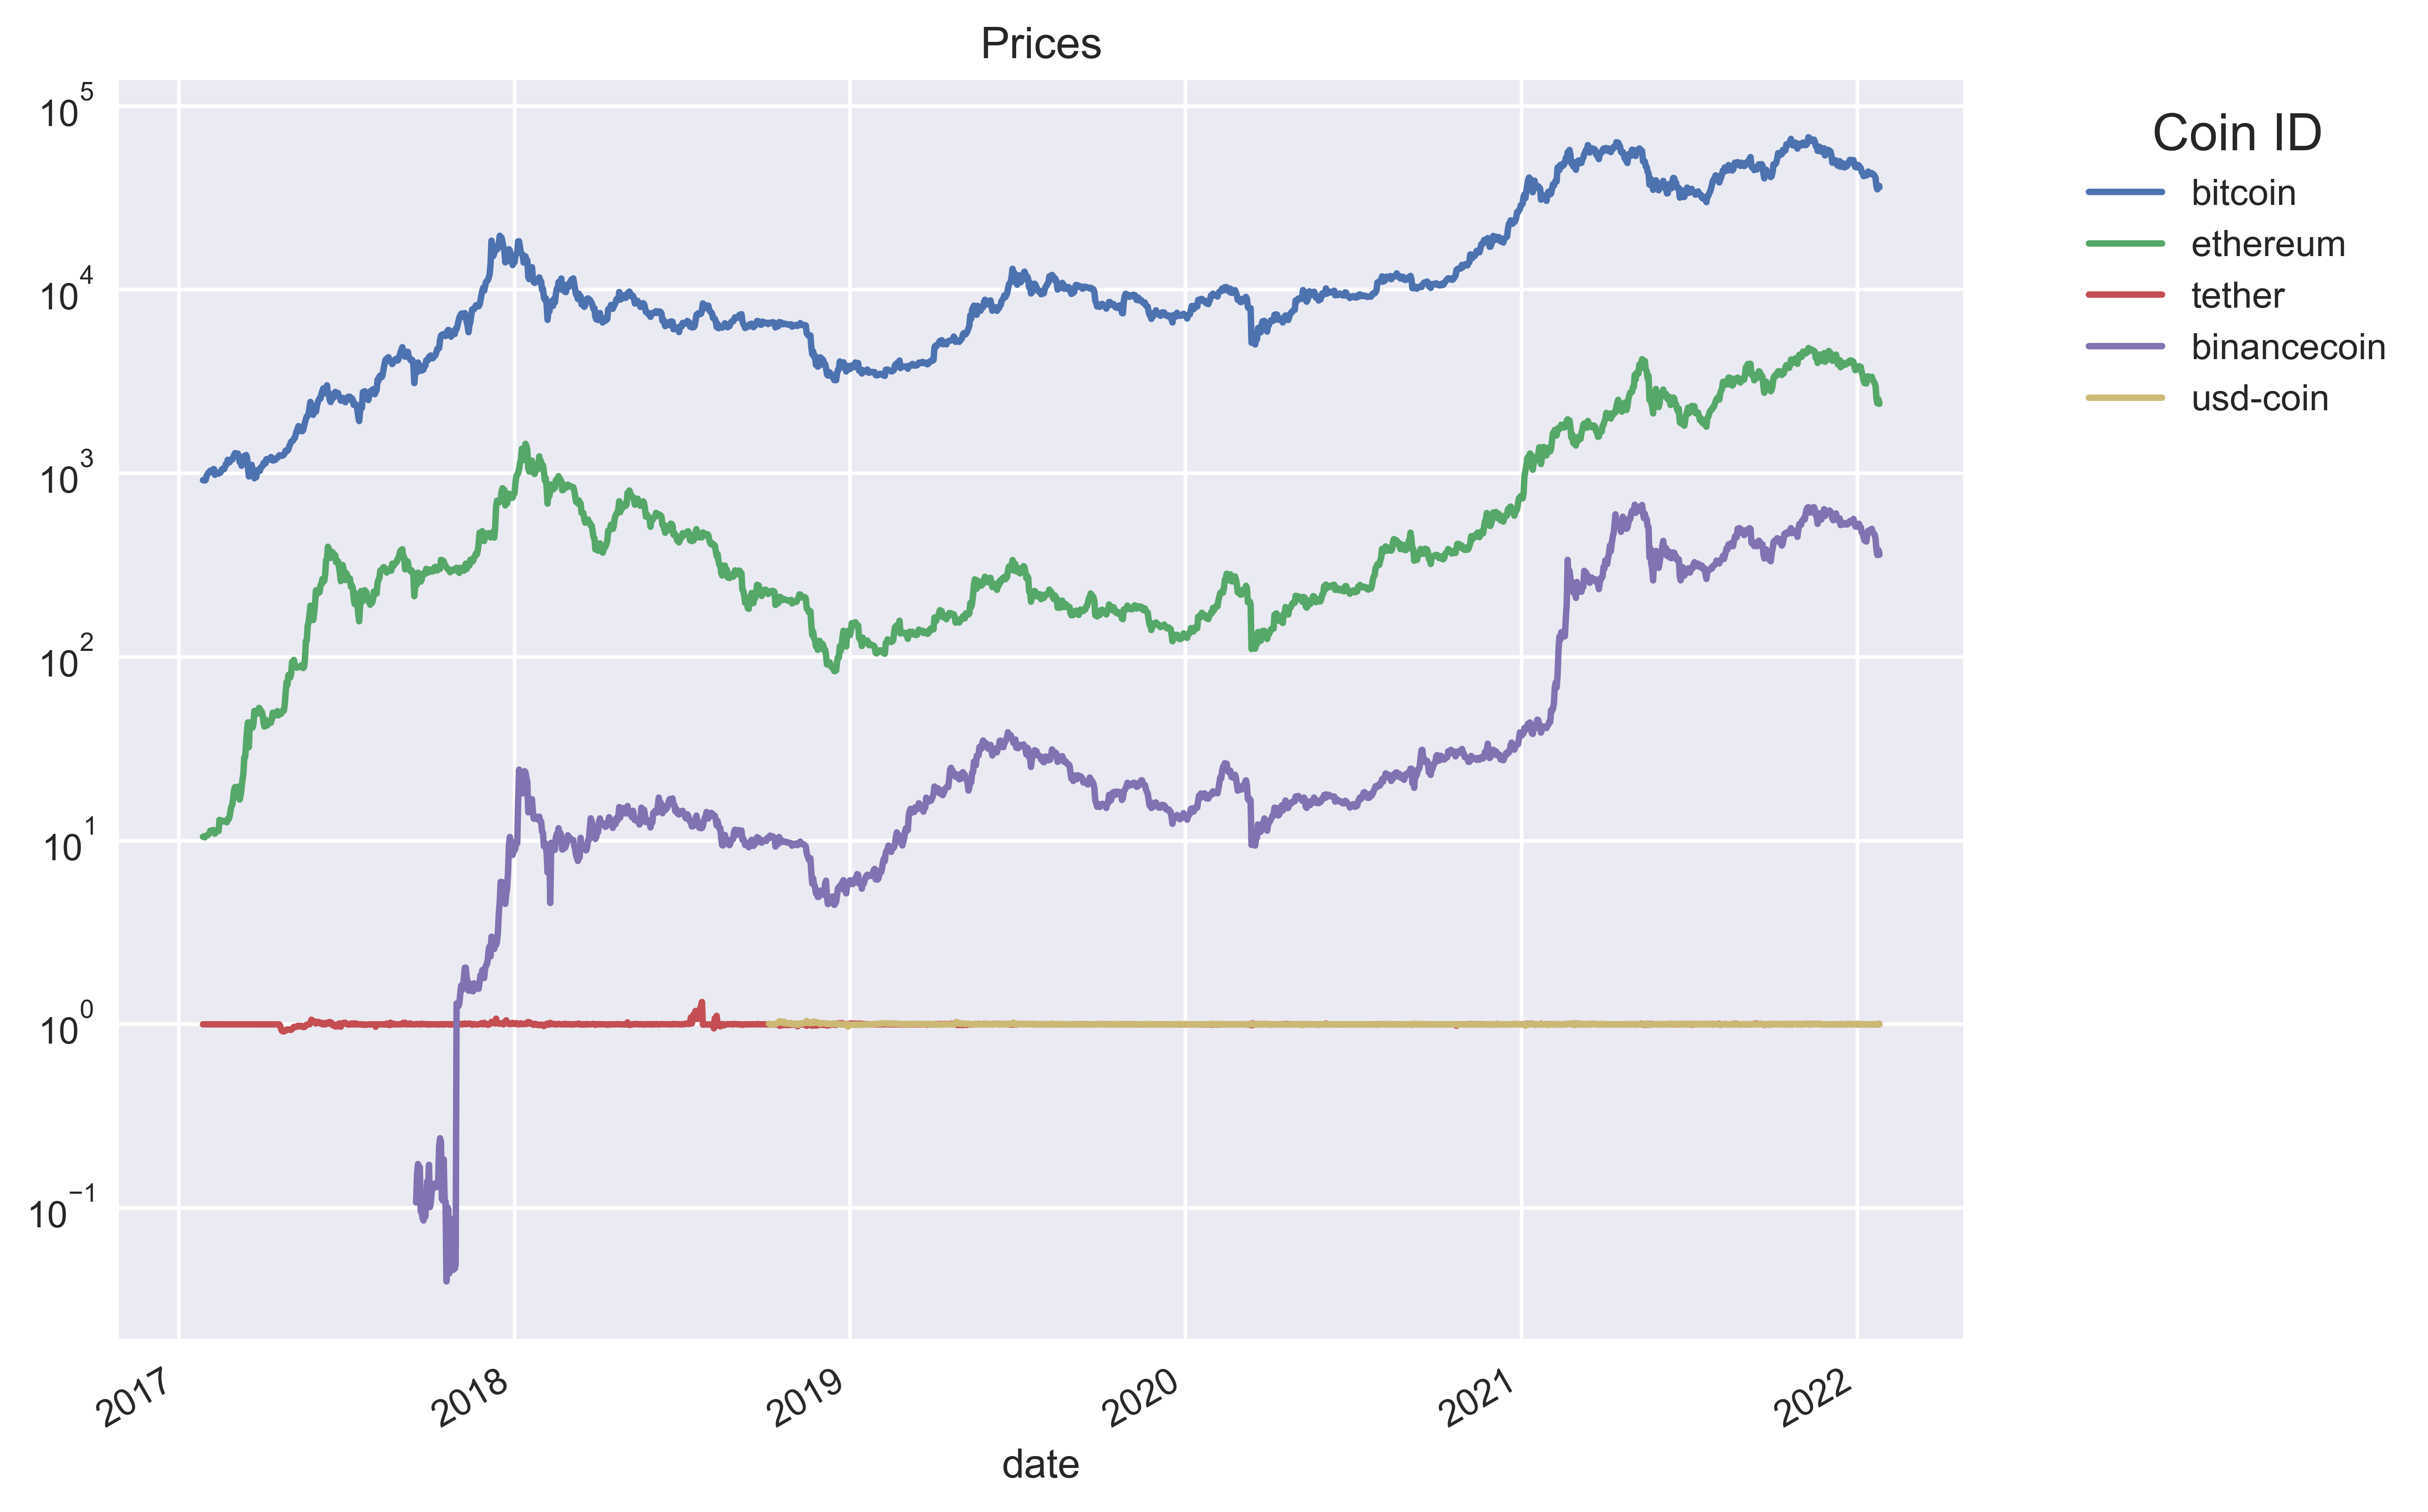

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))
for k, v in df_market_dict.items():
    v.plot(y='prices', label=f'{k}', ax=ax)

ax.set_title('Prices')
ax.set_yscale('log')
ax.legend(title='Coin ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
df = df_market_dict['ethereum']

In [9]:
df = df.rename(columns = {'prices':'close'})

In [10]:
df = df.resample('W-FRI').ffill()
df_eth = df[['close']]

In [11]:
df_eth.isnull().any()

close    False
dtype: bool

In [12]:
print(f'Downloaded {df_eth.shape[0]} rows of data.')

df_eth

Downloaded 262 rows of data.


close
date                   
2017-01-27    10.509979
2017-02-03    10.937686
2017-02-10    11.275641
2017-02-17    12.703484
2017-02-24    13.071871
...                 ...
2021-12-31  3714.945456
2022-01-07  3416.826009
2022-01-14  3256.758866
2022-01-21  3015.588778
2022-01-28  2390.329180

[262 rows x 1 columns]

In [13]:
df_eth.tail(20)

close
date                   
2021-09-17  3573.307516
2021-09-24  3159.269866
2021-10-01  3013.493232
2021-10-08  3594.918358
2021-10-15  3794.516888
2021-10-22  4074.860158
2021-10-29  4288.097219
2021-11-05  4550.014435
2021-11-12  4732.924450
2021-11-19  3993.846595
2021-11-26  4515.843300
2021-12-03  4519.441028
2021-12-10  4153.333311
2021-12-17  3971.559766
2021-12-24  4113.529932
2021-12-31  3714.945456
2022-01-07  3416.826009
2022-01-14  3256.758866
2022-01-21  3015.588778
2022-01-28  2390.329180

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2017-01-27 to 2022-01-28
Freq: W-FRI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None


close
date                   
2017-01-27    10.509979
2017-02-03    10.937686
2017-02-10    11.275641
2017-02-17    12.703484
2017-02-24    13.071871
...                 ...
2021-10-22  4074.860158
2021-10-29  4288.097219
2021-11-05  4550.014435
2021-11-12  4732.924450
2021-11-19  3993.846595

[252 rows x 1 columns]

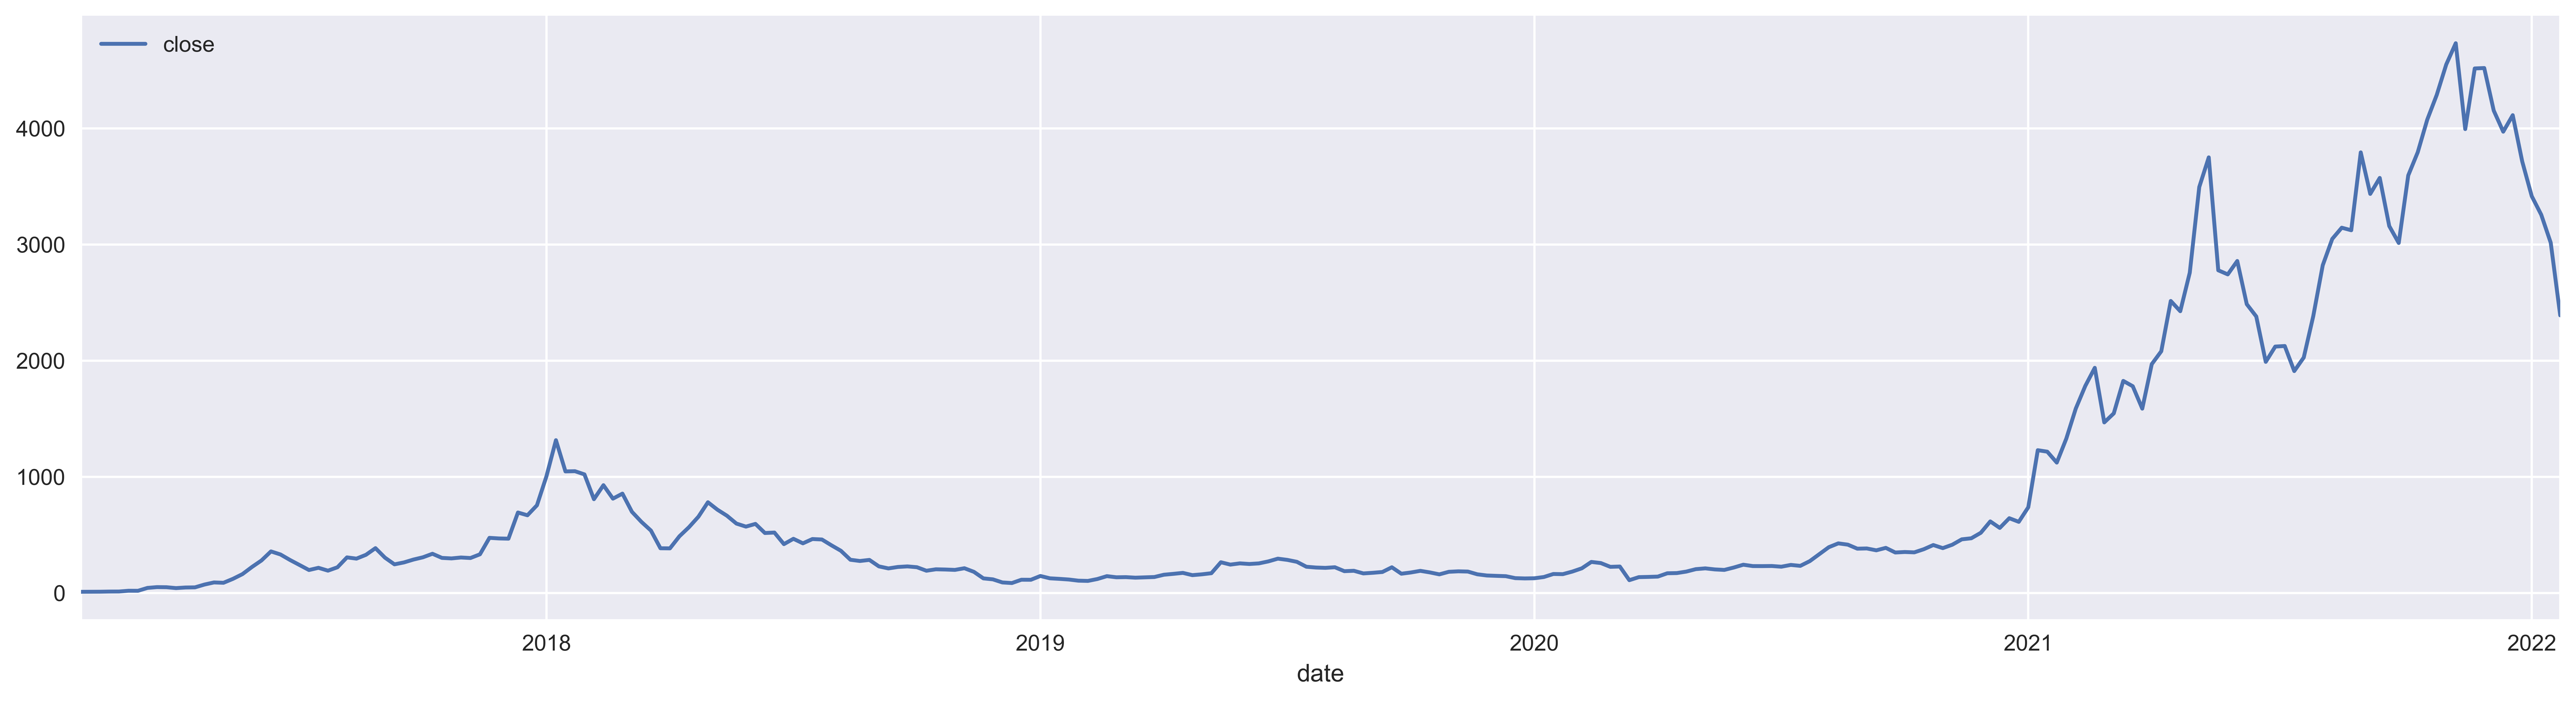

In [14]:
# View the properties of the dataframe

print(df_eth.info())
df_eth.plot(x= None, y='close', legend=True, figsize=(20,5)) 
df_eth[:-10]

# Visualization of rolling mean and standard deviation

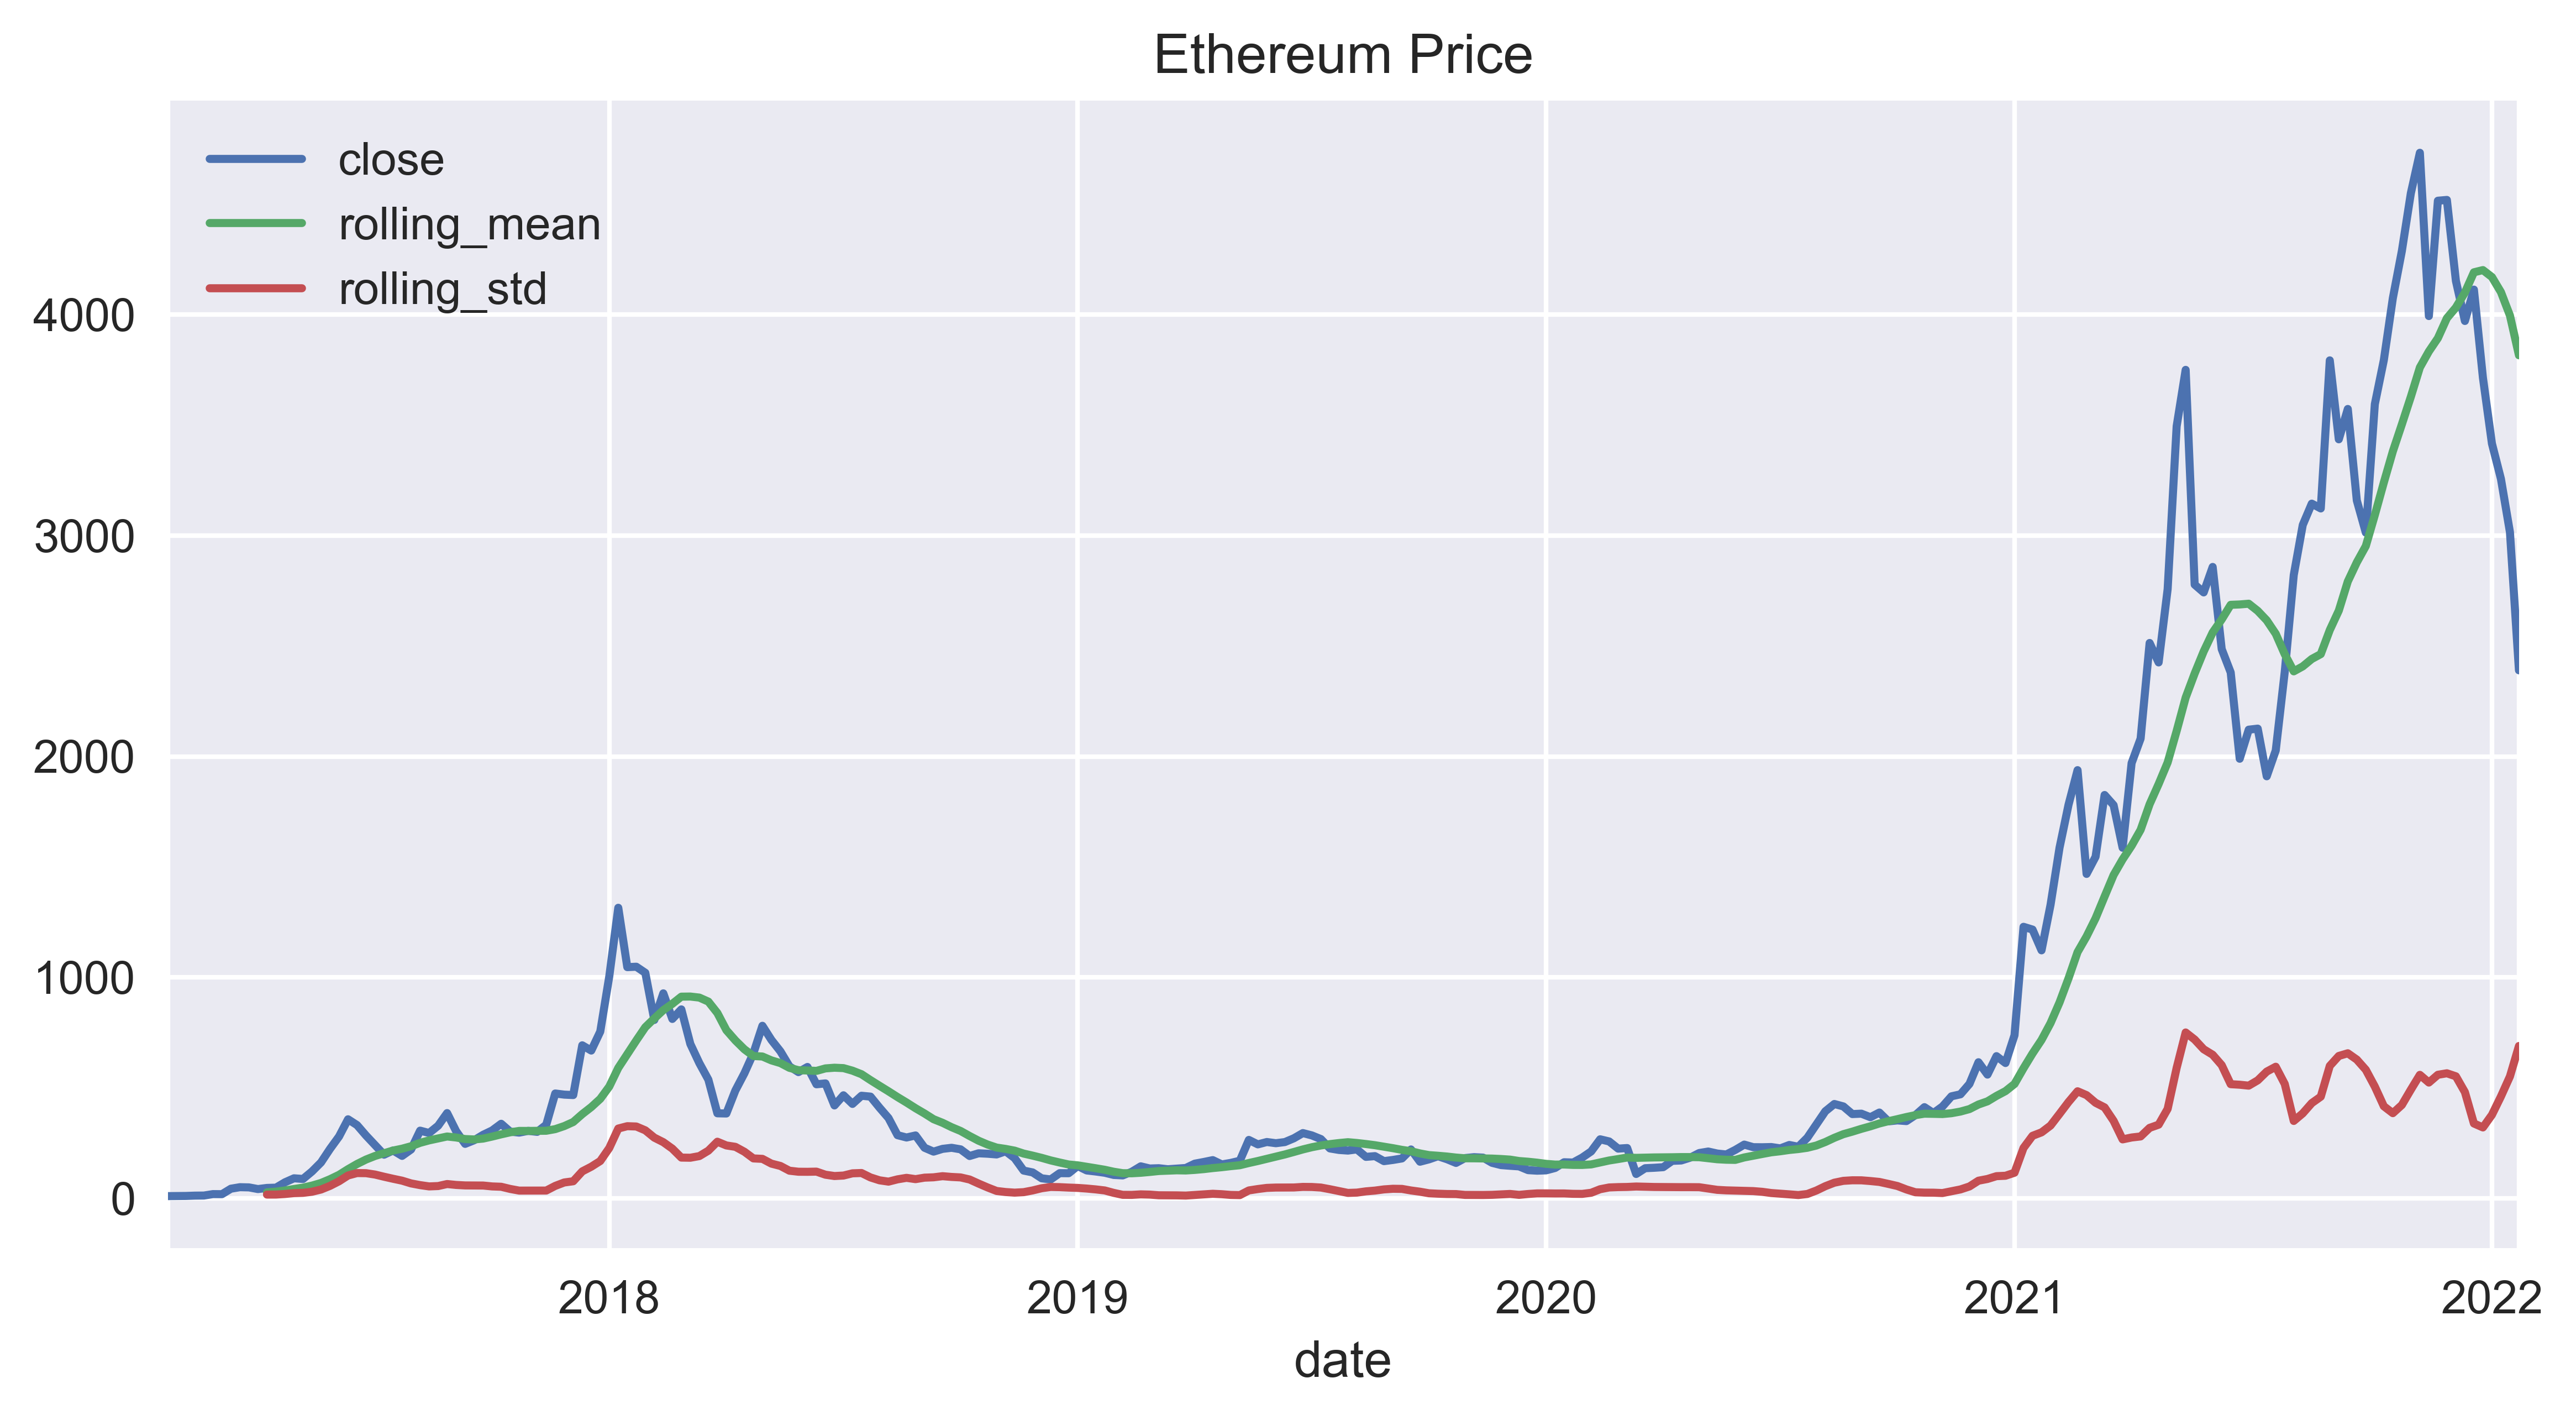

In [15]:
df_rolling = df_eth
WINDOW_SIZE = 12
df_rolling['rolling_mean'] = df_rolling.close.rolling(window=WINDOW_SIZE).mean()
df_rolling['rolling_std'] = df_rolling.close.rolling(window=WINDOW_SIZE).std()
df_rolling.plot(title='Ethereum Price')

plt.tight_layout()
plt.show()

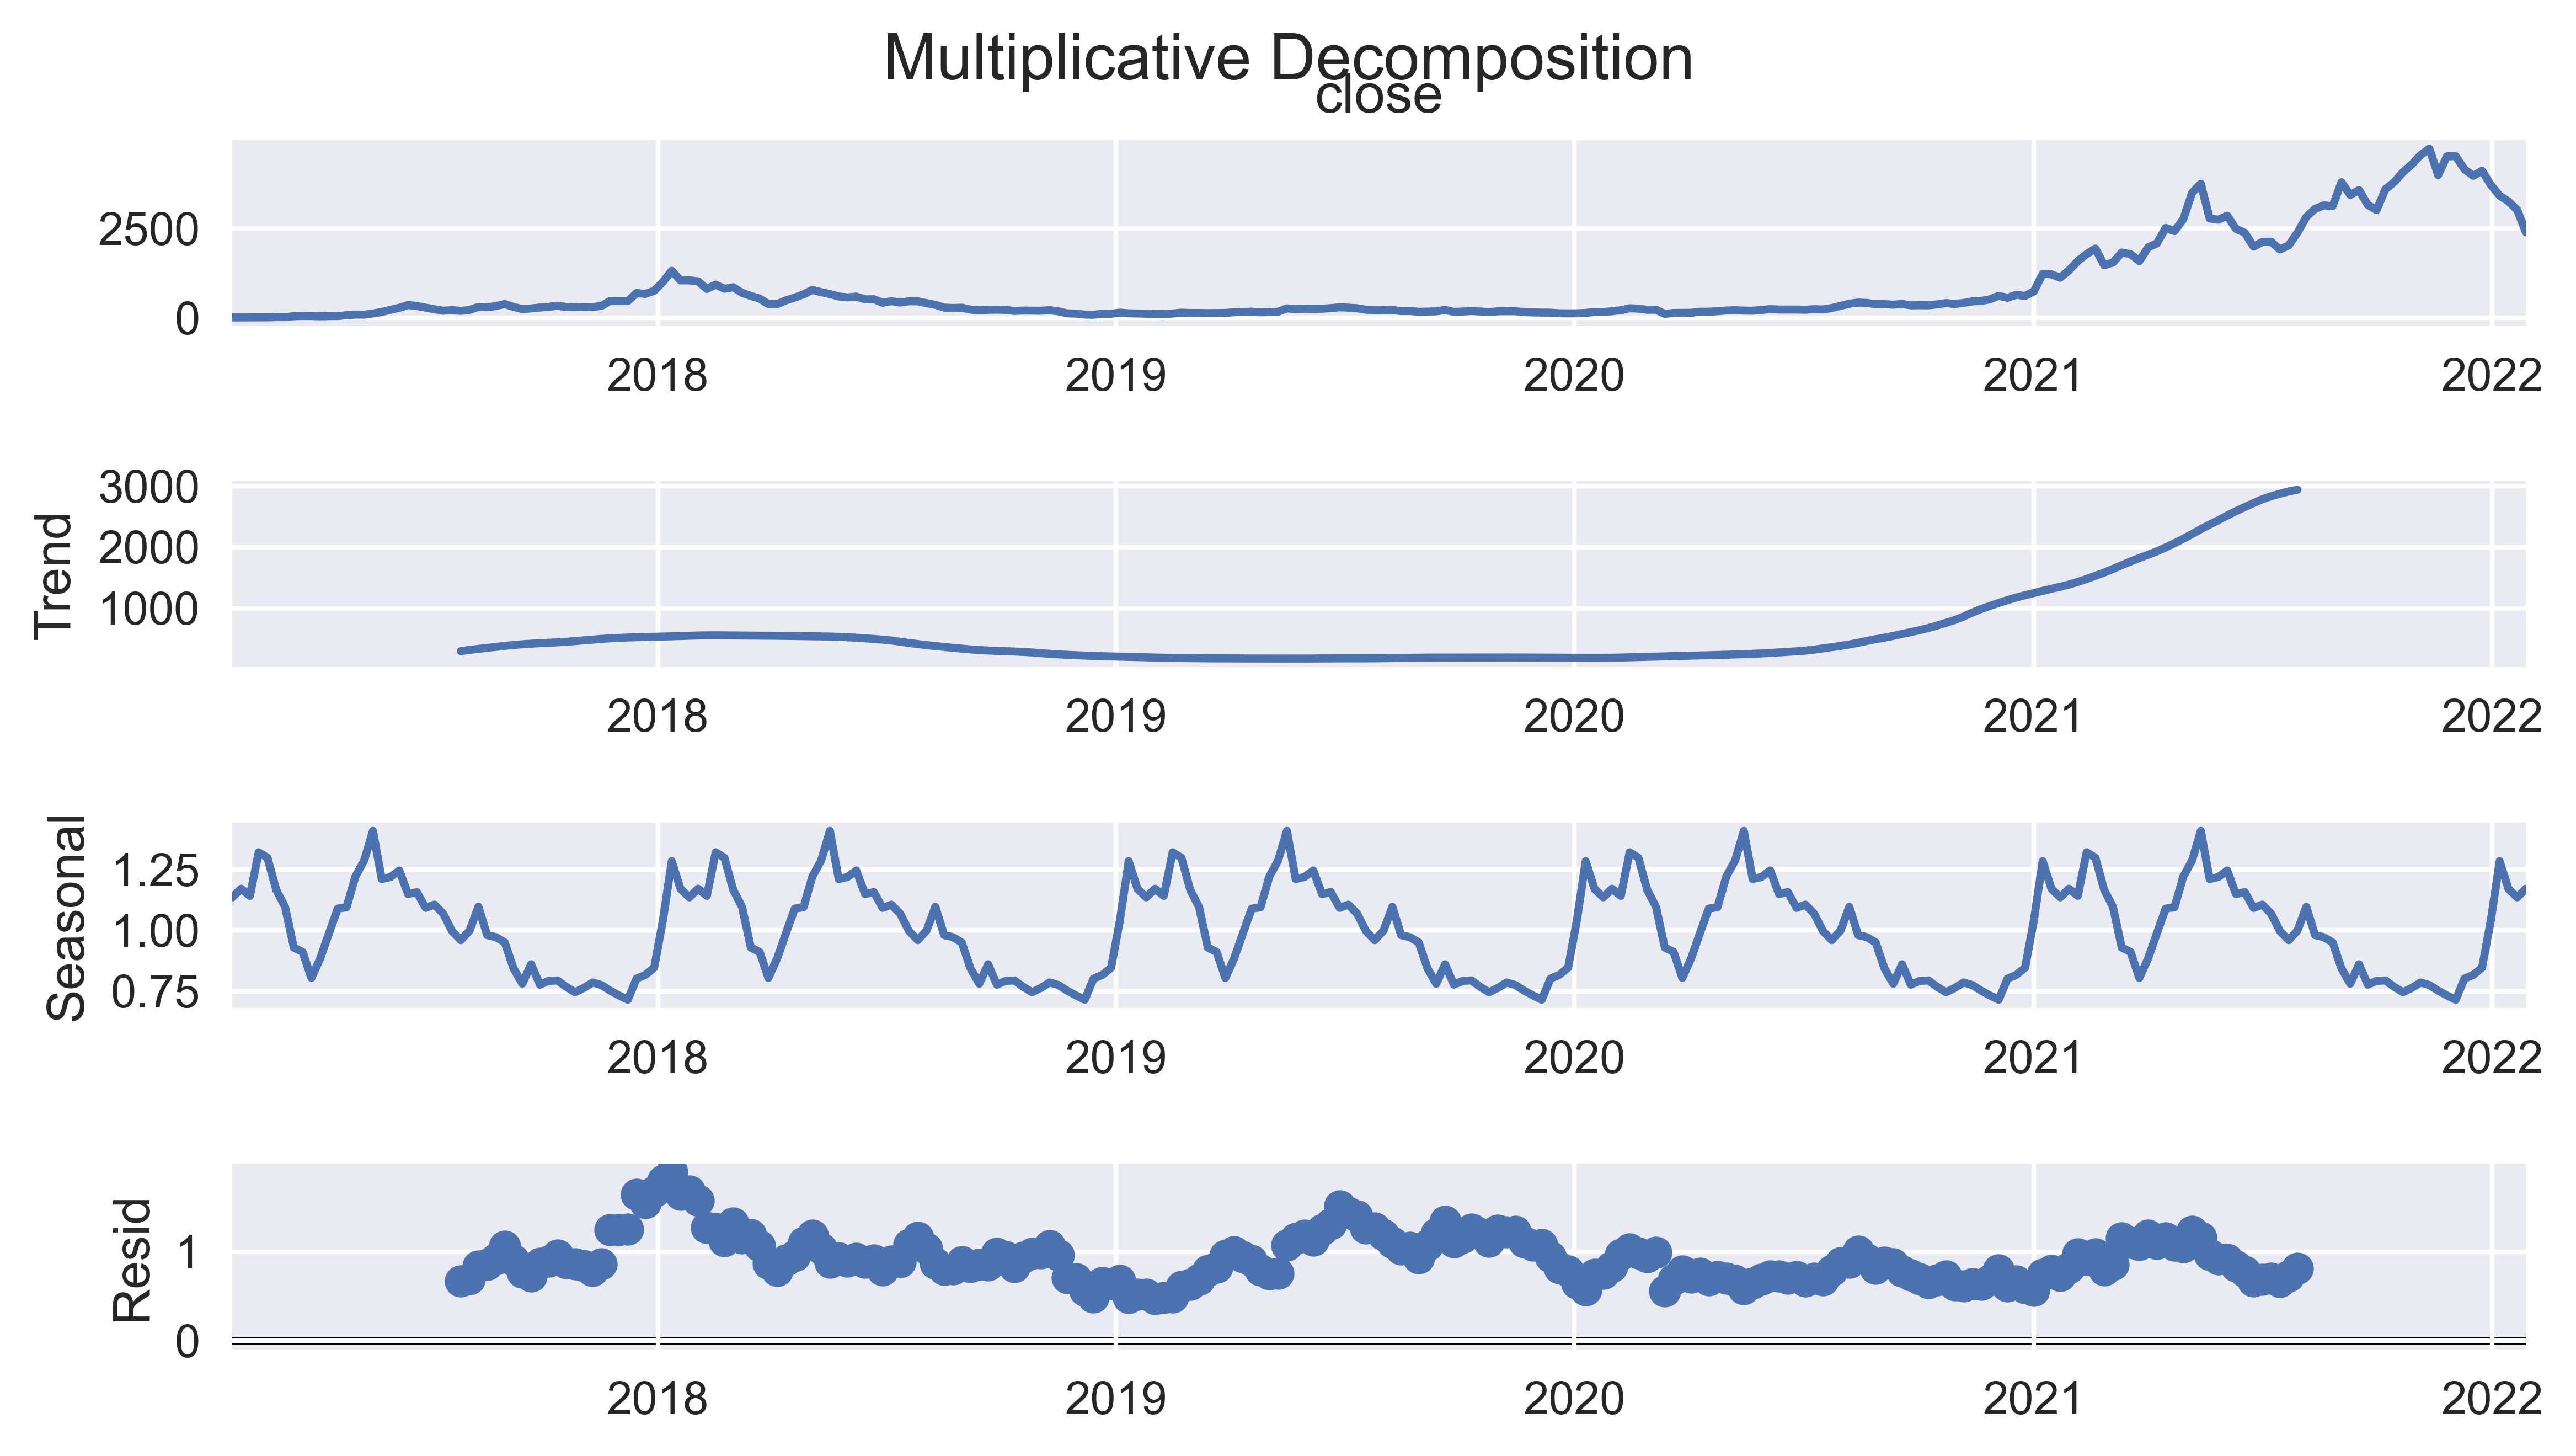

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_results = seasonal_decompose(df_eth.close, 
                                           model='multiplicative')
decomposition_results.plot() \
                     .suptitle('Multiplicative Decomposition',fontsize=14)
plt.tight_layout()
plt.show()

# Stationarity test

In [17]:
# ADF test
adfuller(df_eth['close'])

(-1.0386803396095867,
 0.7388965025146851,
 15,
 246,
 {'1%': -3.457215237265747,
  '5%': -2.873361841566324,
  '10%': -2.5730700760129555},
 3211.682983852454)

In [18]:
# KPSS test
kpss(df_eth['close'])

(1.2655977433156644,
 0.01,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [19]:
# Define function adf_test
def adf_test(x):
    '''
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary
    '''
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index = indices)

    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results


In [20]:
# Test ADF again with defined function
adf_test(df_eth['close'])

Test Statistic             -1.038680
p-value                     0.738897
# of Lags Used             15.000000
# of Observations Used    246.000000
Critical Value (1%)        -3.457215
Critical Value (5%)        -2.873362
Critical Value (10%)       -2.573070
dtype: float64

In [21]:
def kpss_test(x, h0_type='c'):
    '''
    Function for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary

    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend
    
    Returns
    -------
    results: pd.DataFrame
        A DataFrame with the KPSS test's results
    '''
    
    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [22]:
kpss_test(df_eth['close'])

Test Statistic            1.265598
p-value                   0.010000
# of Lags                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

In [23]:
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller, kpss
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plt.rcParams.update({'font.size': 14})

# Fix stationarity for data

In [24]:
# Create difference column
df_eth['diff'] = df_eth['close'].diff(1)
print(df_eth[['close','diff']].head())

                close      diff
date                           
2017-01-27  10.509979       NaN
2017-02-03  10.937686  0.427706
2017-02-10  11.275641  0.337955
2017-02-17  12.703484  1.427843
2017-02-24  13.071871  0.368387


In [25]:
df_eth_y2 = df_eth[['close','diff']]
# Delete NA
df_eth_y2 = df_eth_y2.dropna()
print(df_eth_y2.head())

                close      diff
date                           
2017-02-03  10.937686  0.427706
2017-02-10  11.275641  0.337955
2017-02-17  12.703484  1.427843
2017-02-24  13.071871  0.368387
2017-03-03  19.585749  6.513878


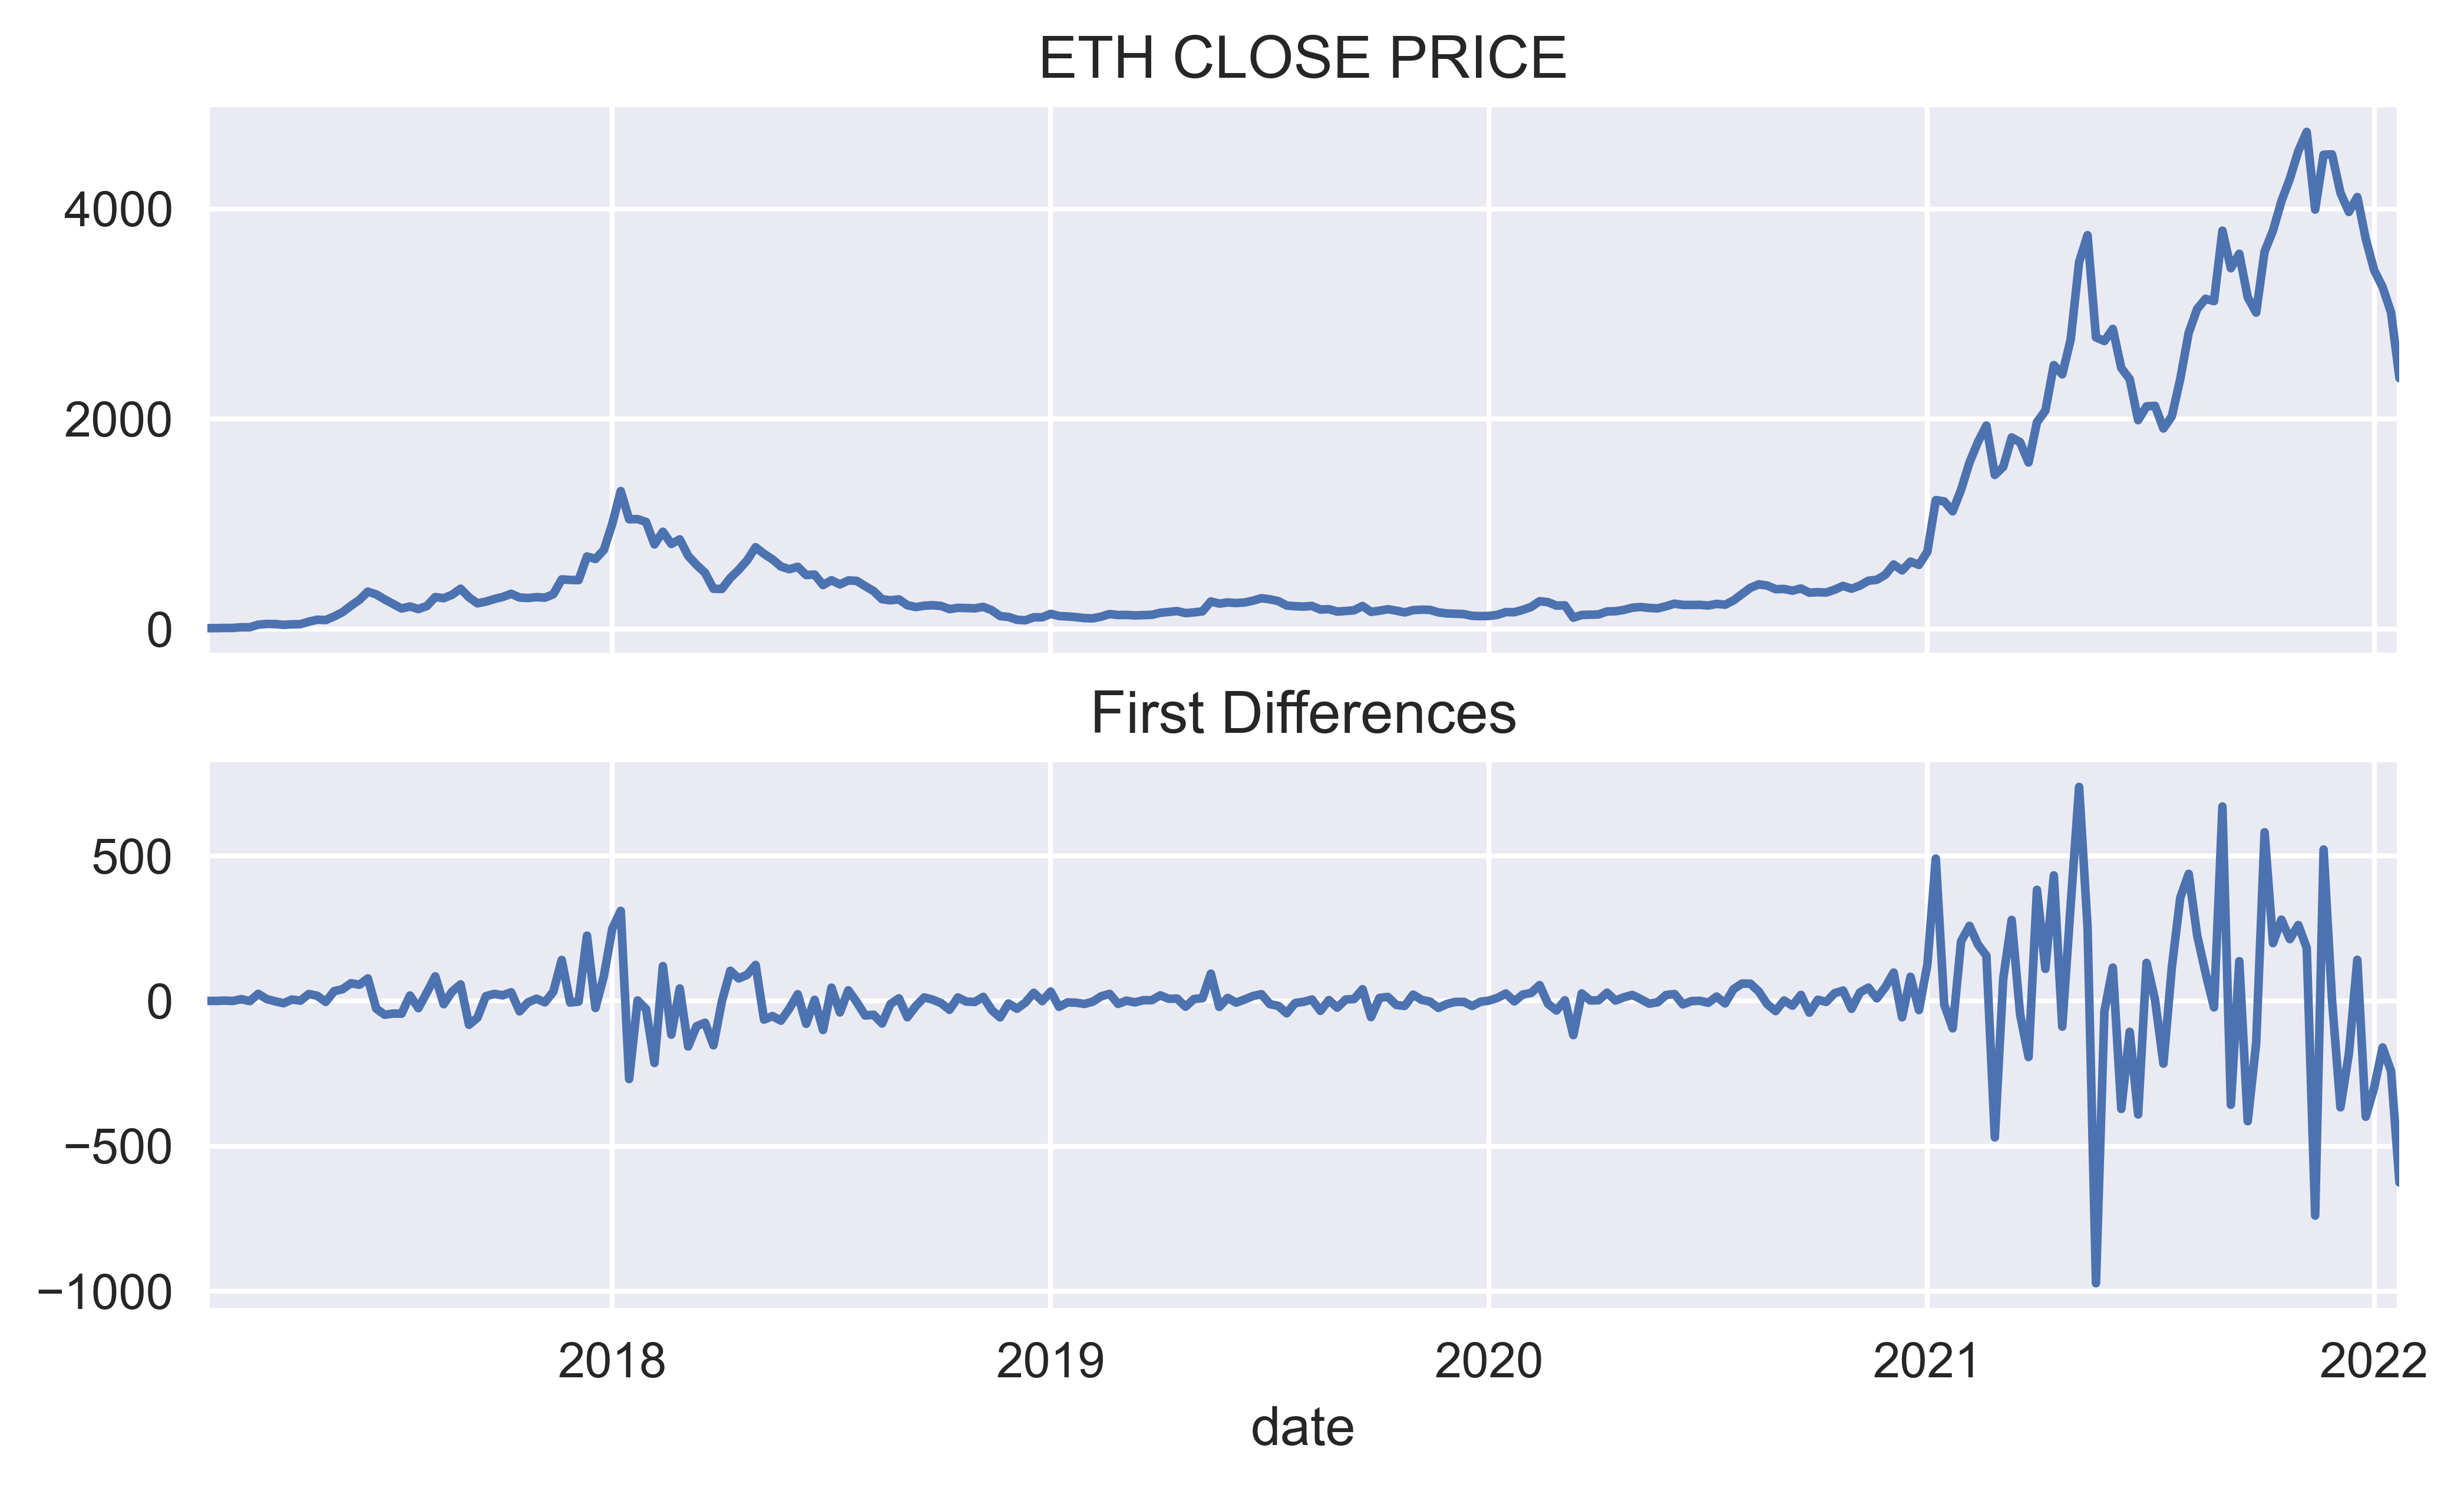

In [26]:
# Draw plot
fig, ax = plt.subplots(2, sharex = True)
df_eth_y2['close'].plot(ax = ax[0], title = 'ETH CLOSE PRICE')
df_eth_y2['diff'].plot(ax = ax[1], title = 'First Differences')

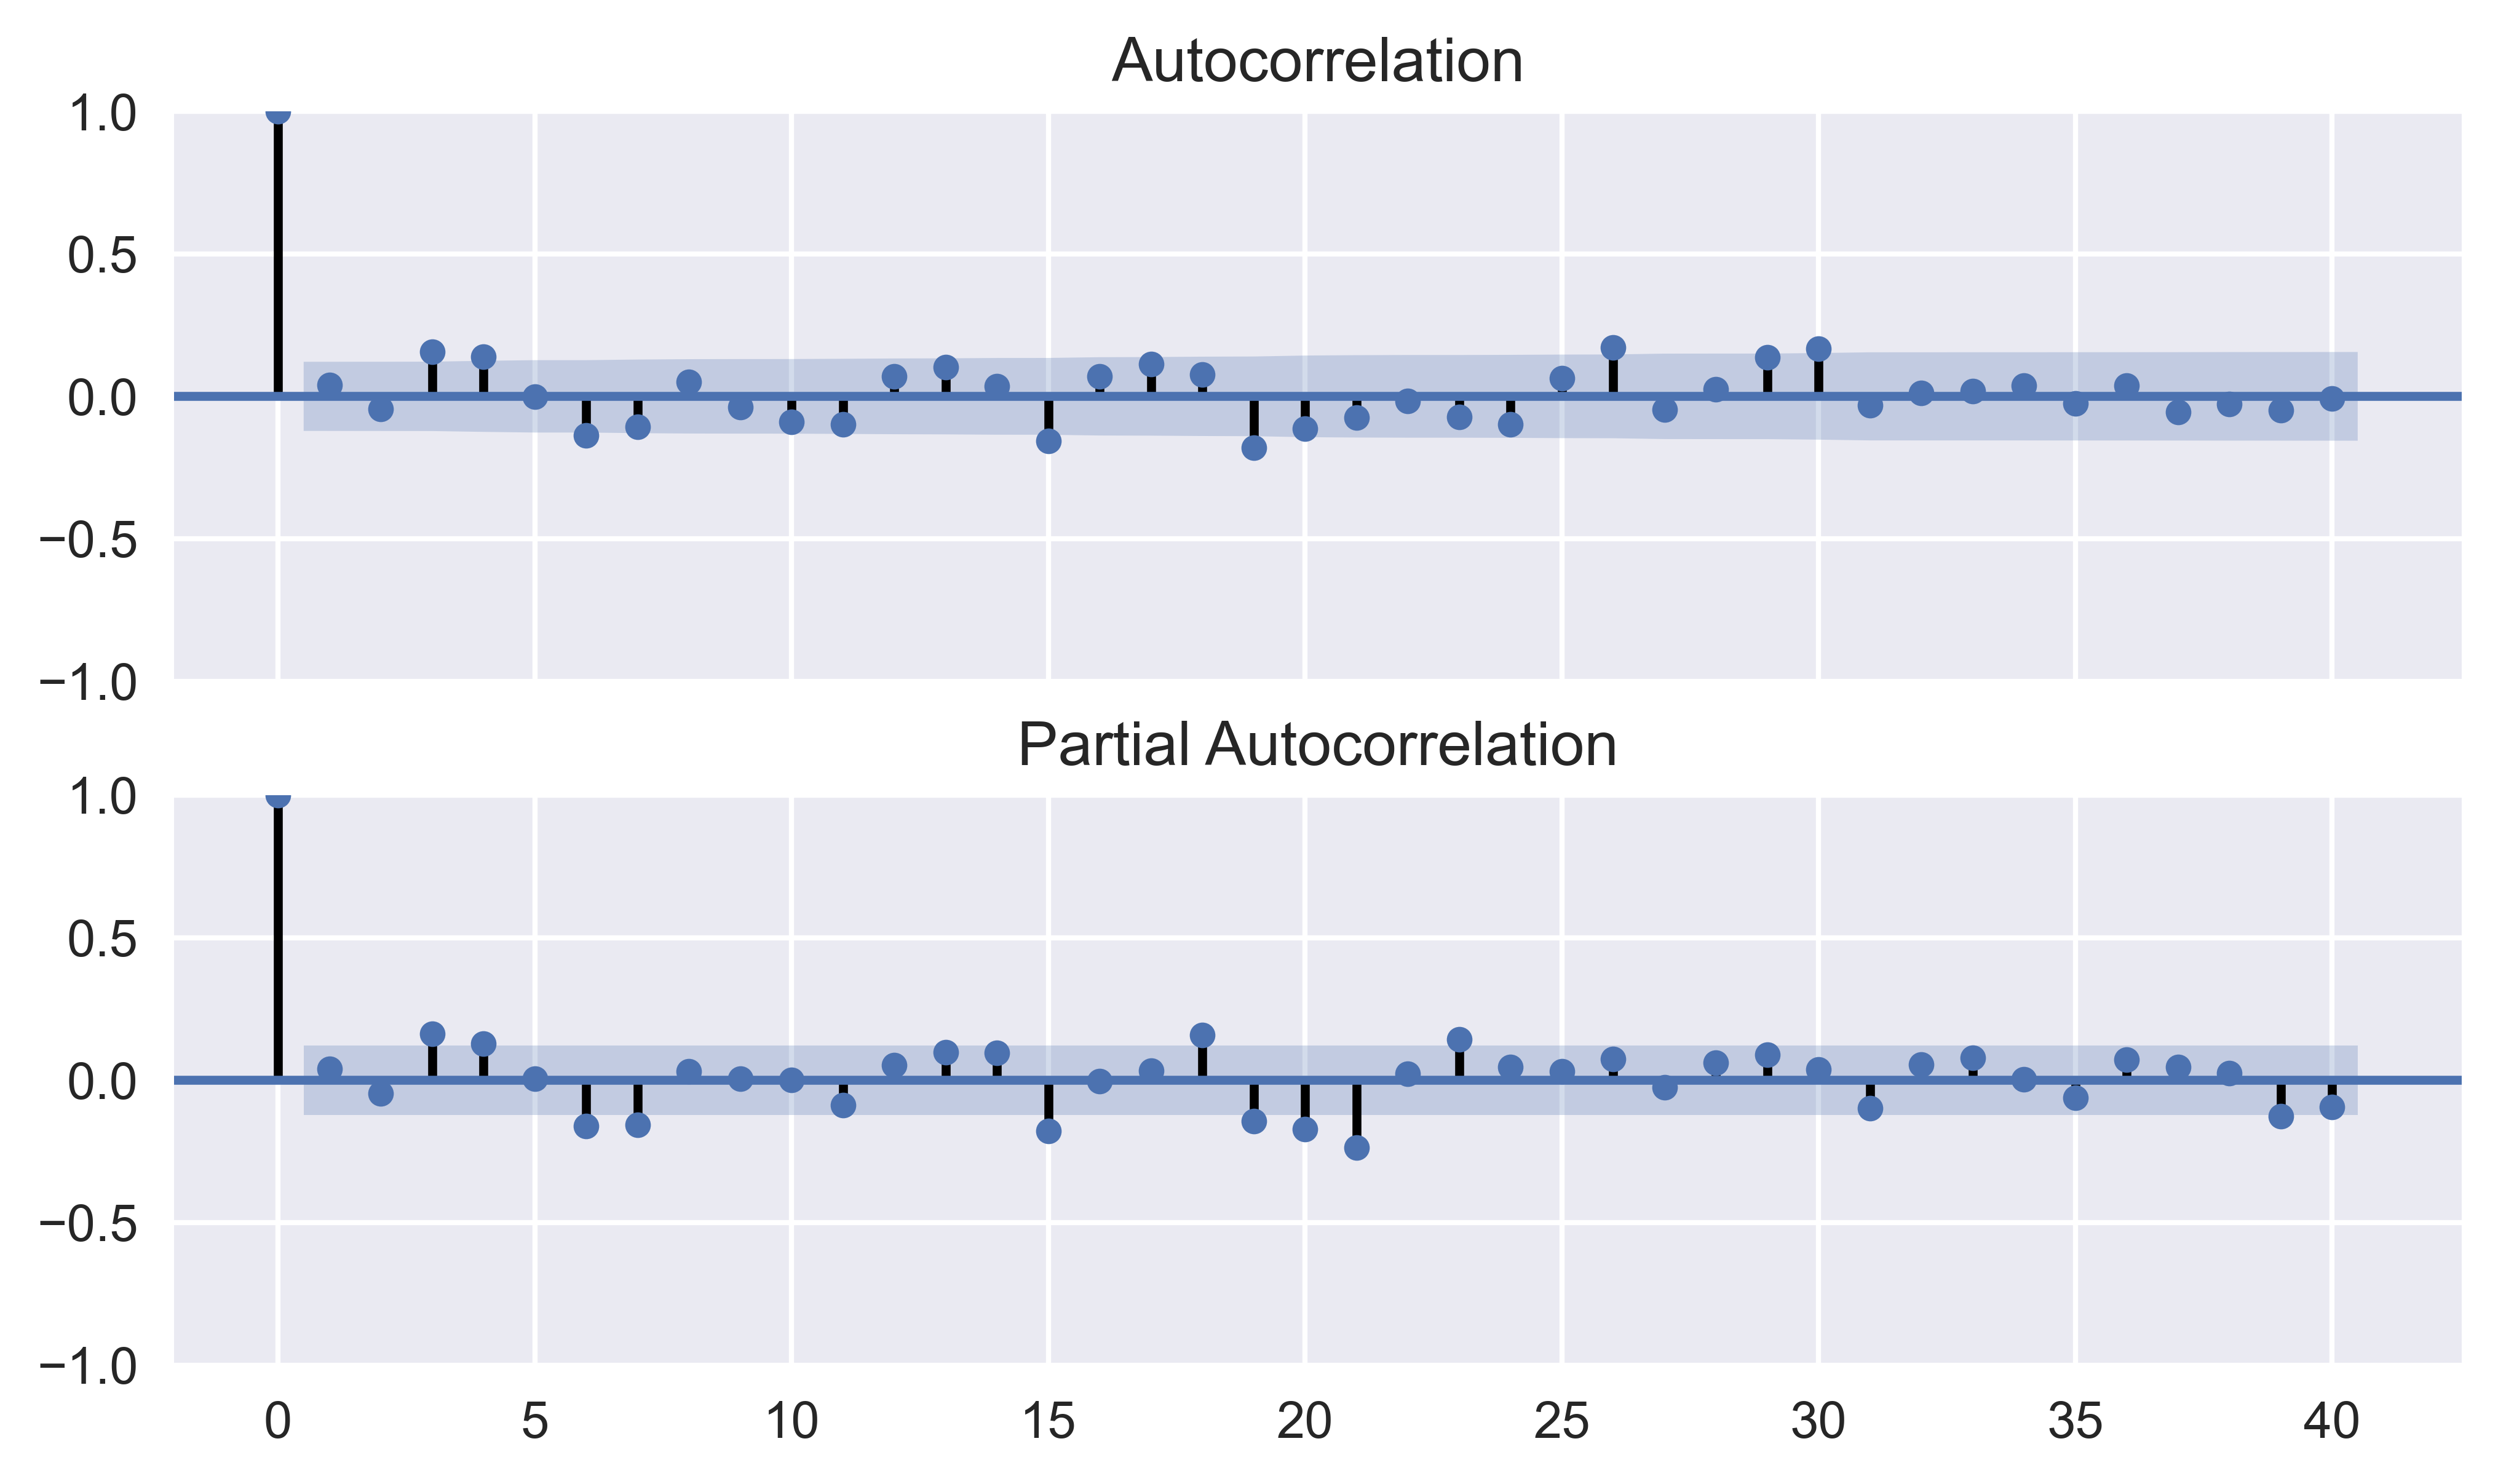

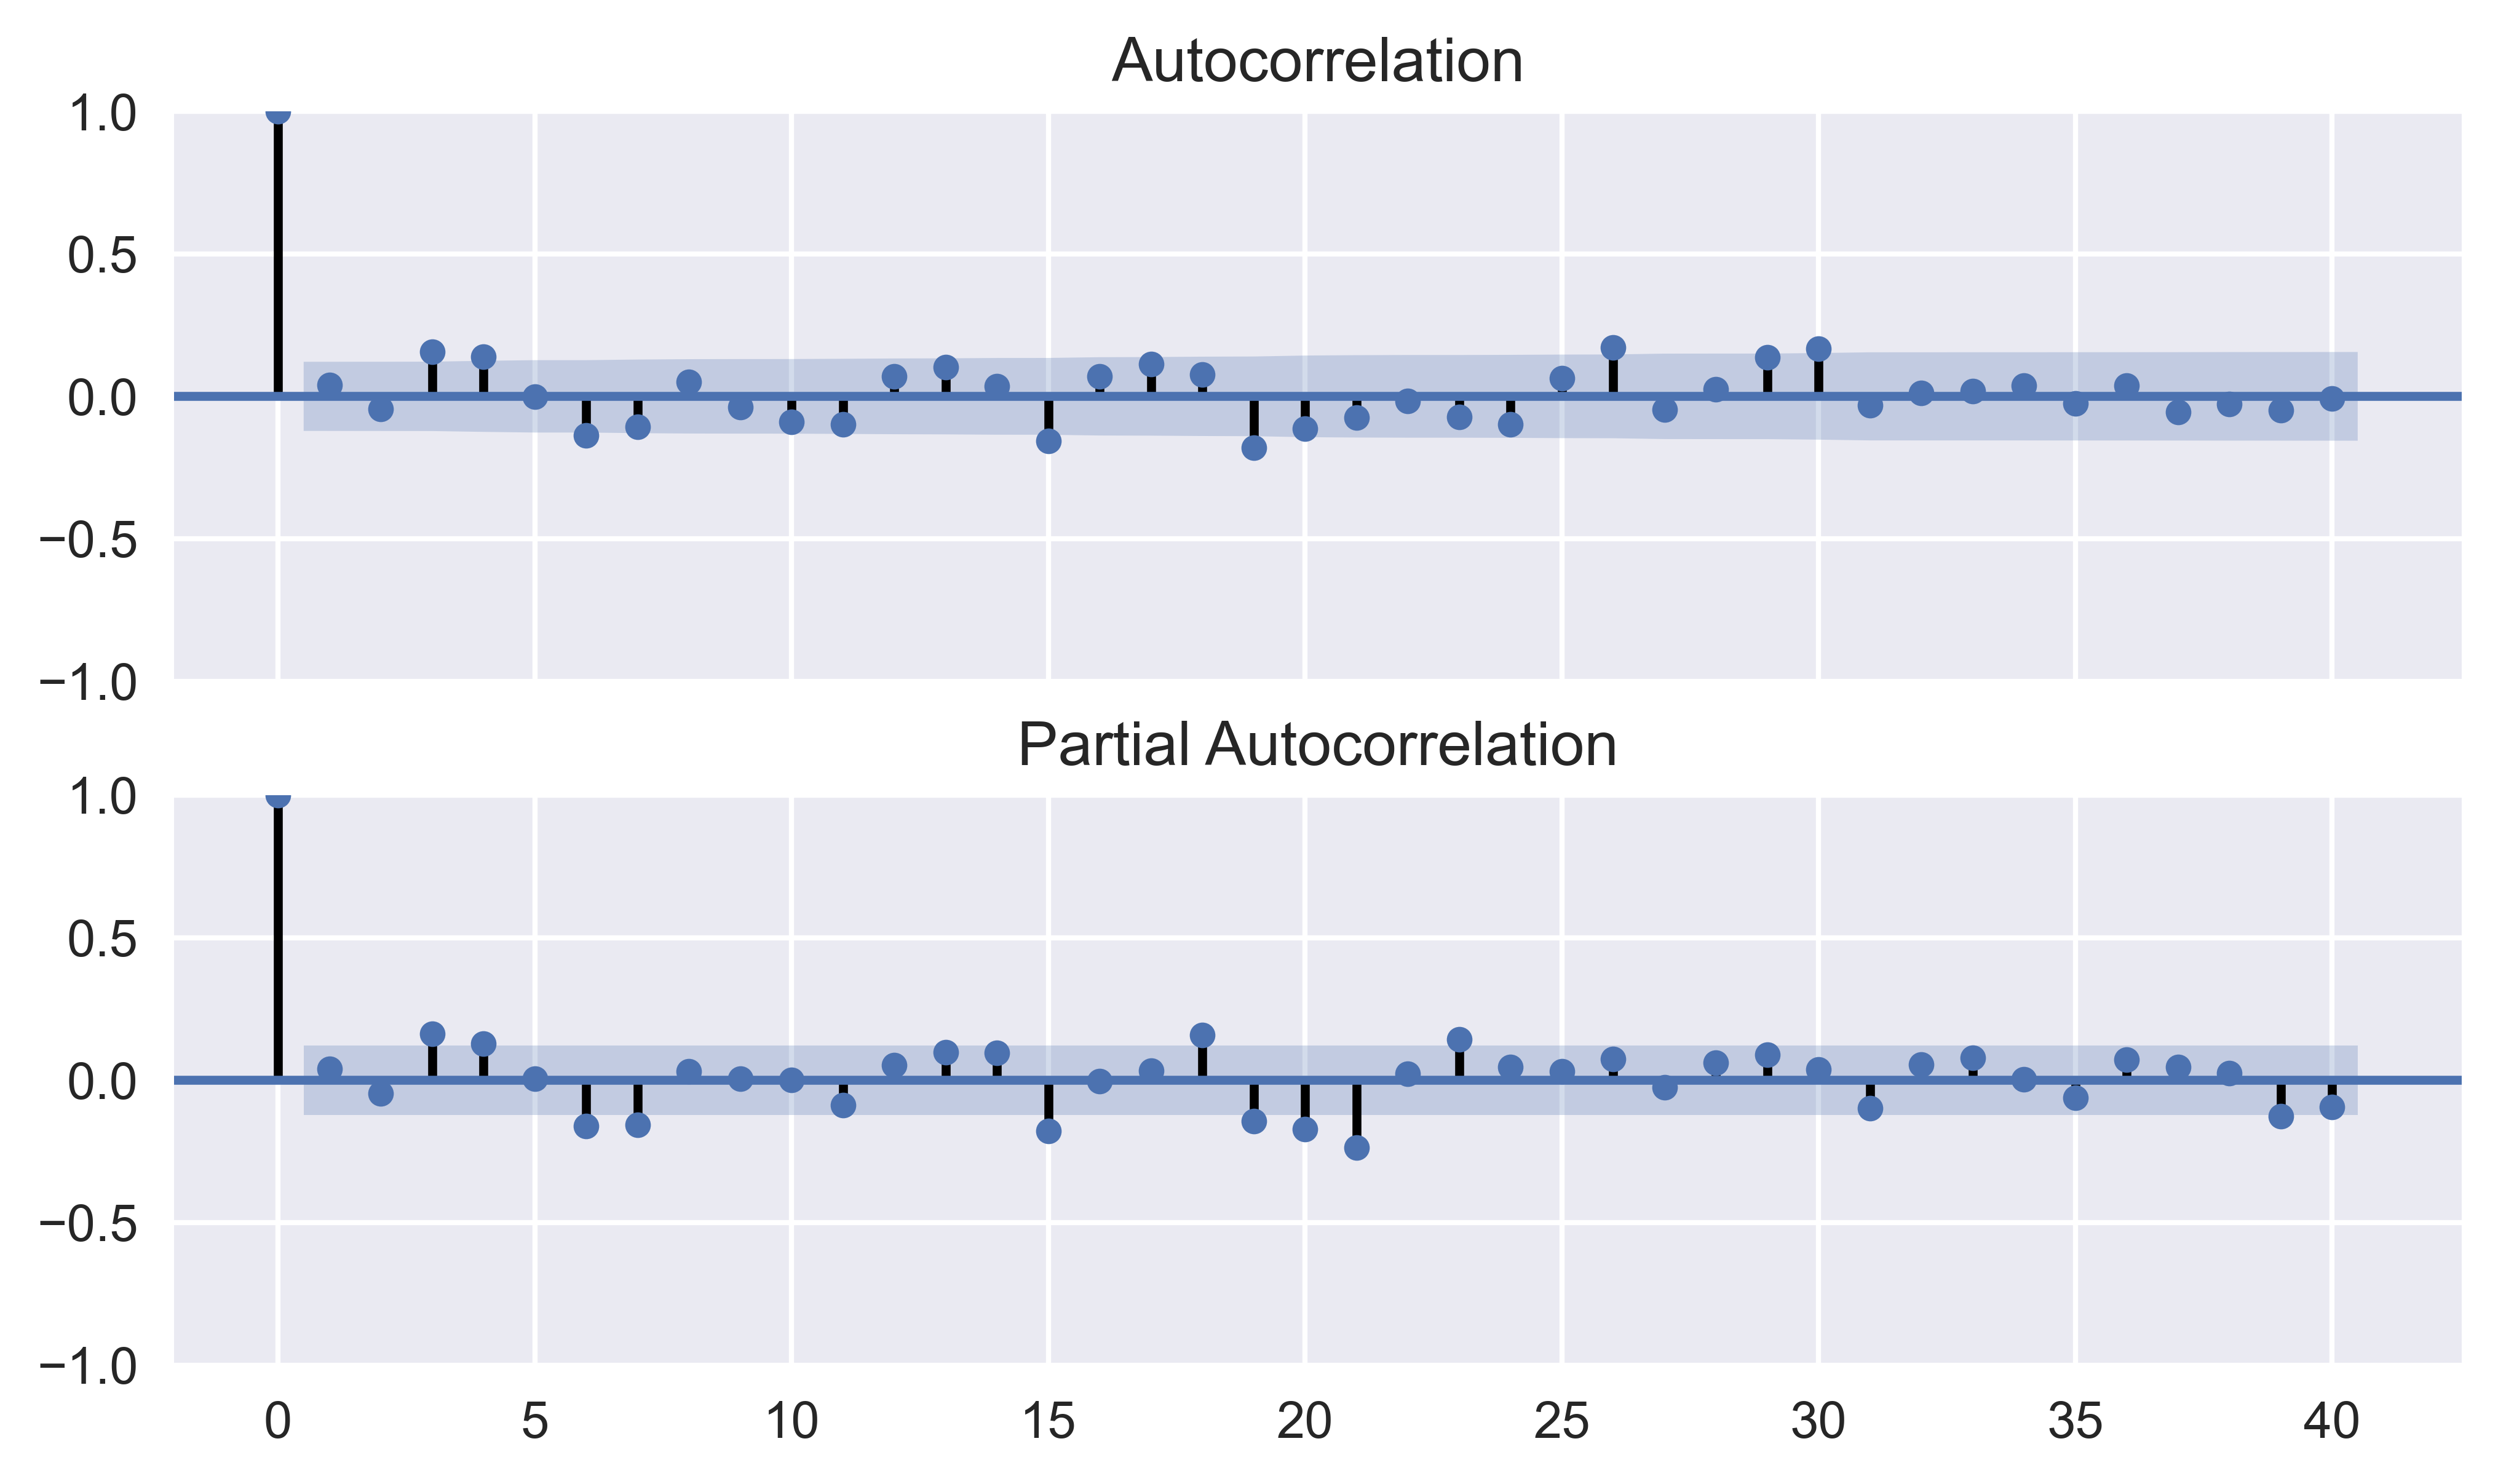

In [27]:
# ACF & PACF plot
fig, ax = plt.subplots(2, sharex = True)
plot_acf(df_eth_y2['diff'], ax = ax[0], lags = 40, alpha = 0.05)
plot_pacf(df_eth_y2['diff'], ax = ax[1], lags = 40, alpha = 0.05)

In [28]:
adf_results = adf_test(df_eth_y2['diff'])
kpss_results = kpss_test(df_eth_y2['diff'])

print('ADF test statistic: {:.2f} (p-val: {:.2f})'.format(adf_results['Test Statistic'],
                                                             adf_results['p-value']))
print('KPSS test statistic: {:.2f} (p-val: {:.2f})'.format(kpss_results['Test Statistic'],
                                                              kpss_results['p-value']))

ADF test statistic: -3.42 (p-val: 0.01)
KPSS test statistic: 0.09 (p-val: 0.10)


In [29]:
from pmdarima.arima import ndiffs, nsdiffs
print(f"Suggested # of differences (ADF): {ndiffs(df_eth_y2.close, test='adf')}")
print(f"Suggested # of differences (KPSS): {ndiffs(df_eth_y2.close, test='kpss')}")

Suggested # of differences (ADF): 1
Suggested # of differences (KPSS): 1


# ARIMA Model

In [30]:
arima = sm.tsa.arima.ARIMA(df_eth['close'], order=(0, 1, 0)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  262
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1707.953
Date:                Tue, 25 Jan 2022   AIC                           3417.906
Time:                        12:24:53   BIC                           3421.471
Sample:                    01-27-2017   HQIC                          3419.339
                         - 01-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.828e+04   1062.952     26.604      0.000    2.62e+04    3.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               894.23
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              11.46   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
auto_arima = pm.auto_arima(df_eth['close'], trace = 1, 
                           error_action = 'ignore',
                           suppress_warnings = True,
                           seasonal = False,
                           stepwise = True,
                           approximation = False,
                           n_jobs = -1,
                           seasonal_test = False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3419.138, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3420.702, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3420.647, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3417.906, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3421.301, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.801 seconds


In [32]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1707.953
Date:                Tue, 25 Jan 2022   AIC                           3417.906
Time:                        12:24:54   BIC                           3421.471
Sample:                             0   HQIC                          3419.339
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.828e+04   1062.952     26.604      0.000    2.62e+04    3.04e+04
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               894.23
Prob(Q):                              0.52   Pr

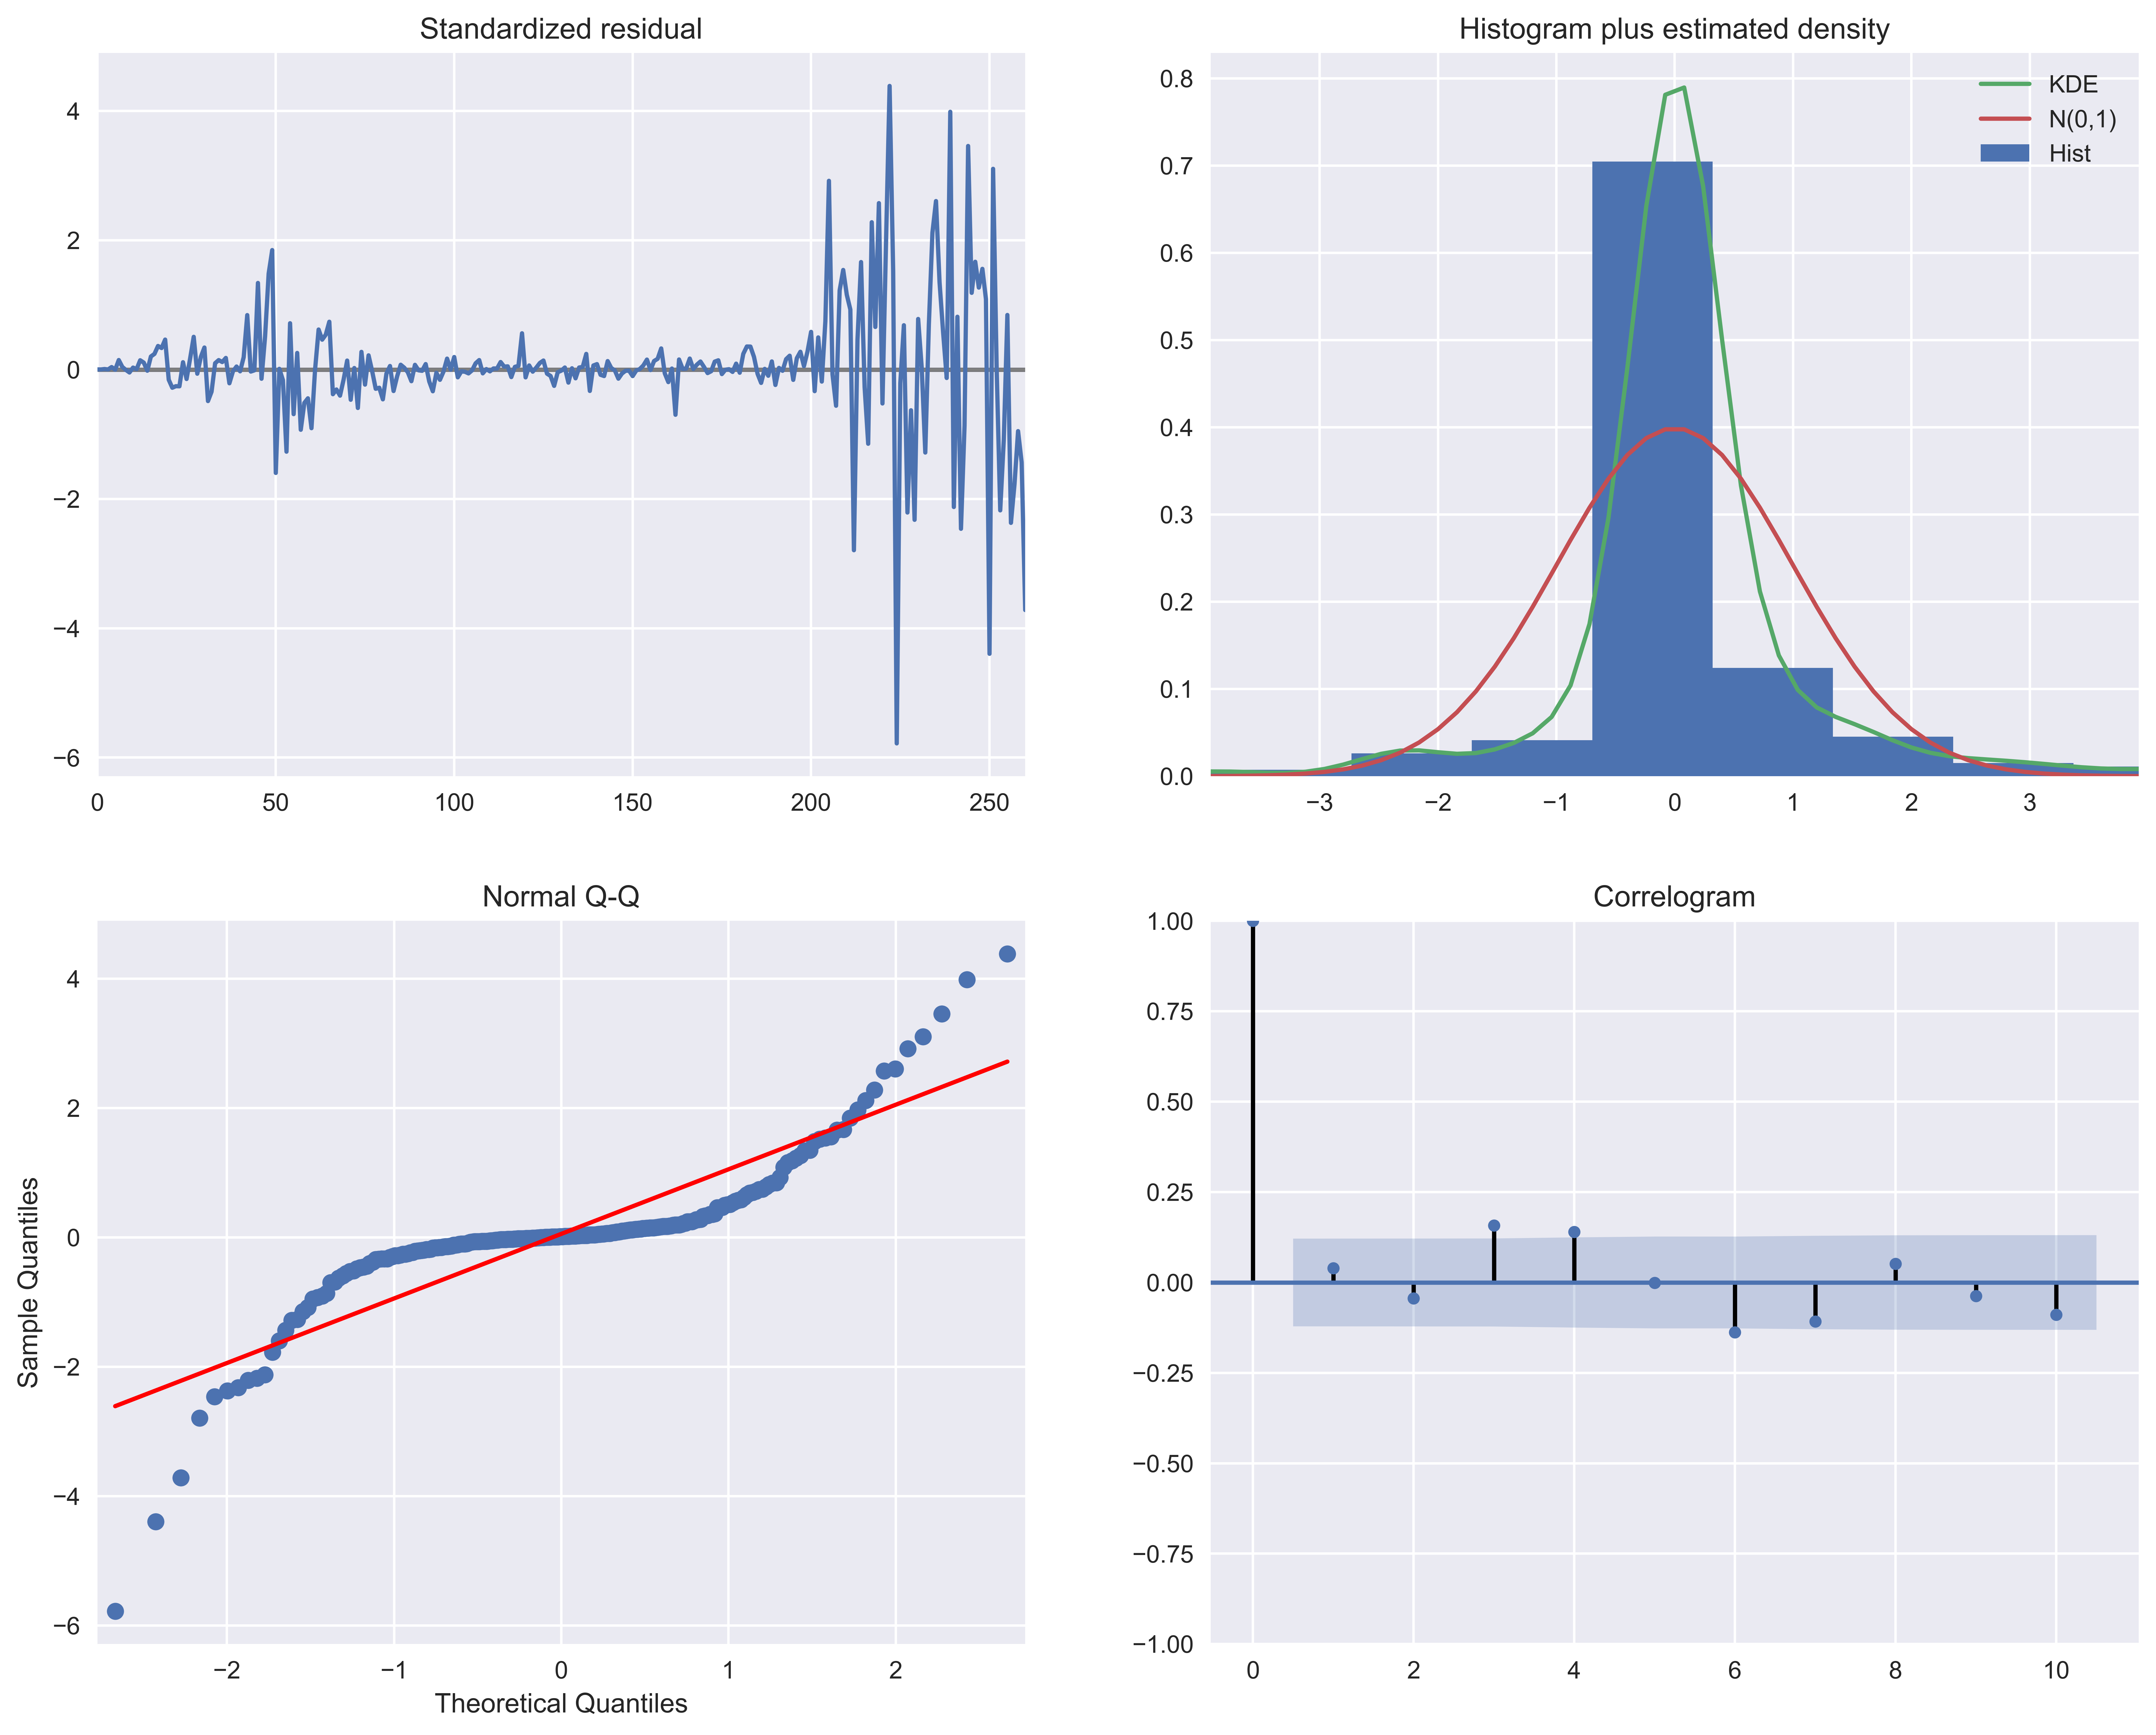

In [33]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

# Ljung-Box's Test

In [34]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [35]:
import matplotlib.pyplot as plt
sm.stats.acorr_ljungbox(arima.resid,  return_df=True)

lb_stat  lb_pvalue
1    0.421520   0.516180
2    0.930204   0.628071
3    7.550026   0.056287
4   12.790765   0.012345
5   12.790885   0.025419
6   17.930337   0.006409
7   21.069806   0.003668
8   21.797519   0.005305
9   22.181599   0.008321
10  24.359860   0.006700

# Prediction

In [36]:
# Spilt data into training and testing
print(df_eth.shape)
train = df_eth.iloc[:-12]
test = df_eth.iloc[-12:]
print(train.shape, test.shape)

(262, 4)
(250, 4) (12, 4)


In [37]:
test

close  rolling_mean  rolling_std        diff
date                                                          
2021-11-12  4732.924450   3761.137883   559.387833  182.910015
2021-11-19  3993.846595   3833.710783   524.470096 -739.077855
2021-11-26  4515.843300   3893.922662   559.701532  521.996705
2021-12-03  4519.441028   3984.211087   566.461227    3.597728
2021-12-10  4153.333311   4032.546570   552.793427 -366.107717
2021-12-17  3971.559766   4100.237395   481.239773 -181.773544
2021-12-24  4113.529932   4191.907120   339.228090  141.970166
2021-12-31  3714.945456   4201.909378   321.322405 -398.584476
2022-01-07  3416.826009   4170.435138   378.301070 -298.119447
2022-01-14  3256.758866   4102.260031   461.629949 -160.067142
2022-01-21  3015.588778   3996.217661   552.309485 -241.170089
2022-01-28  2390.329180   3816.243889   690.125396 -625.259597

In [38]:
model = ARIMA(train['close'], order=(0,1,0))

In [39]:
# Train the model
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1601.330
Date:                Tue, 25 Jan 2022   AIC                           3204.660
Time:                        12:24:58   BIC                           3208.177
Sample:                    01-27-2017   HQIC                          3206.076
                         - 11-05-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.257e+04    767.078     29.418      0.000    2.11e+04    2.41e+04
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):              1571.18
Prob(Q):                              0.28   Pr

In [40]:
# Make prediction on test set
start = len(train)
end= len(train) + len(test)
pred = model.predict(start=start+1,end=end,typ='levels')
pred.index = pd.to_datetime(test.index, format="%Y-%m-%d")

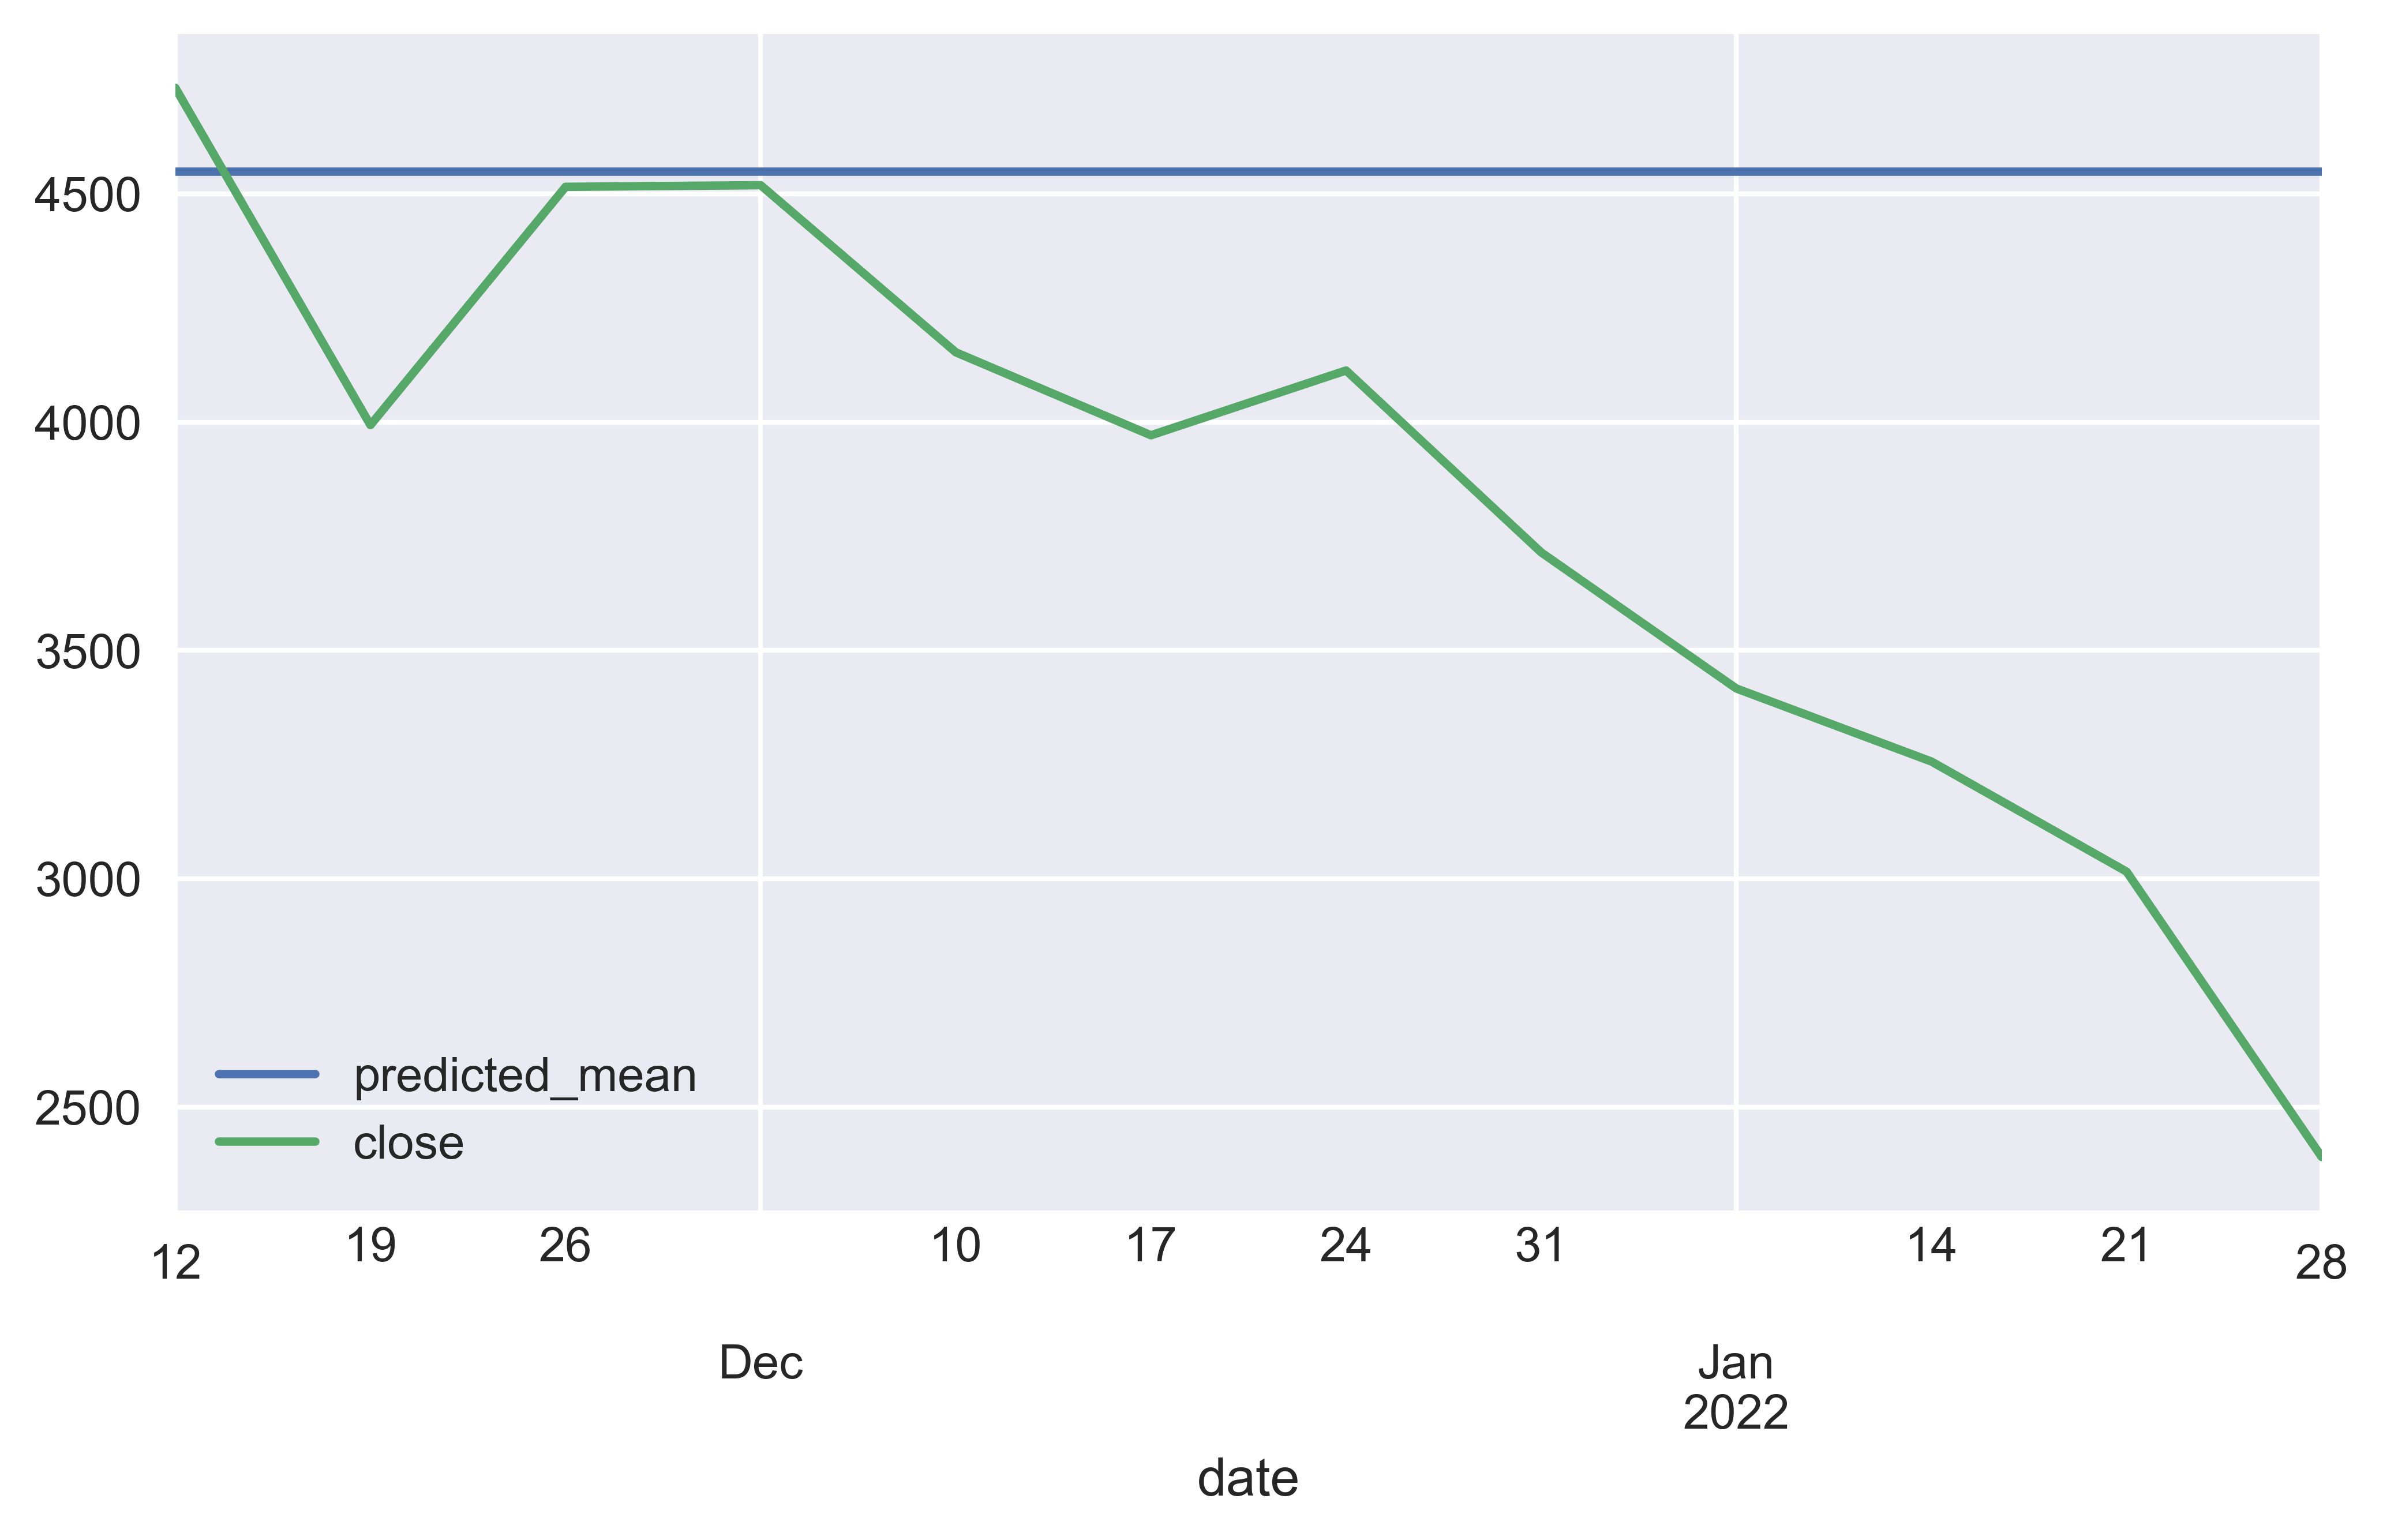

In [41]:
pred.index = pd.to_datetime(pred.index, format="%Y-%m-%d")
test.index = pd.to_datetime(test.index, format="%Y-%m-%d")
pred.plot(legend=True)
test['close'].plot(legend=True)

In [42]:
test['close'].mean()

3816.2438892574887

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [44]:
# MSE The Mean Squared Error of our forecasts is
mse = ((pred - test['close']) ** 2).mean()
print('MSE of our forecasts {}'.format(round(mse, 2)))
# RMSE The Root Mean Squared Error of
print('RMSE our forecasts is {}'.format(round(np.sqrt(mse), 2)))

MSE of our forecasts 975002.85
RMSE our forecasts is 987.42


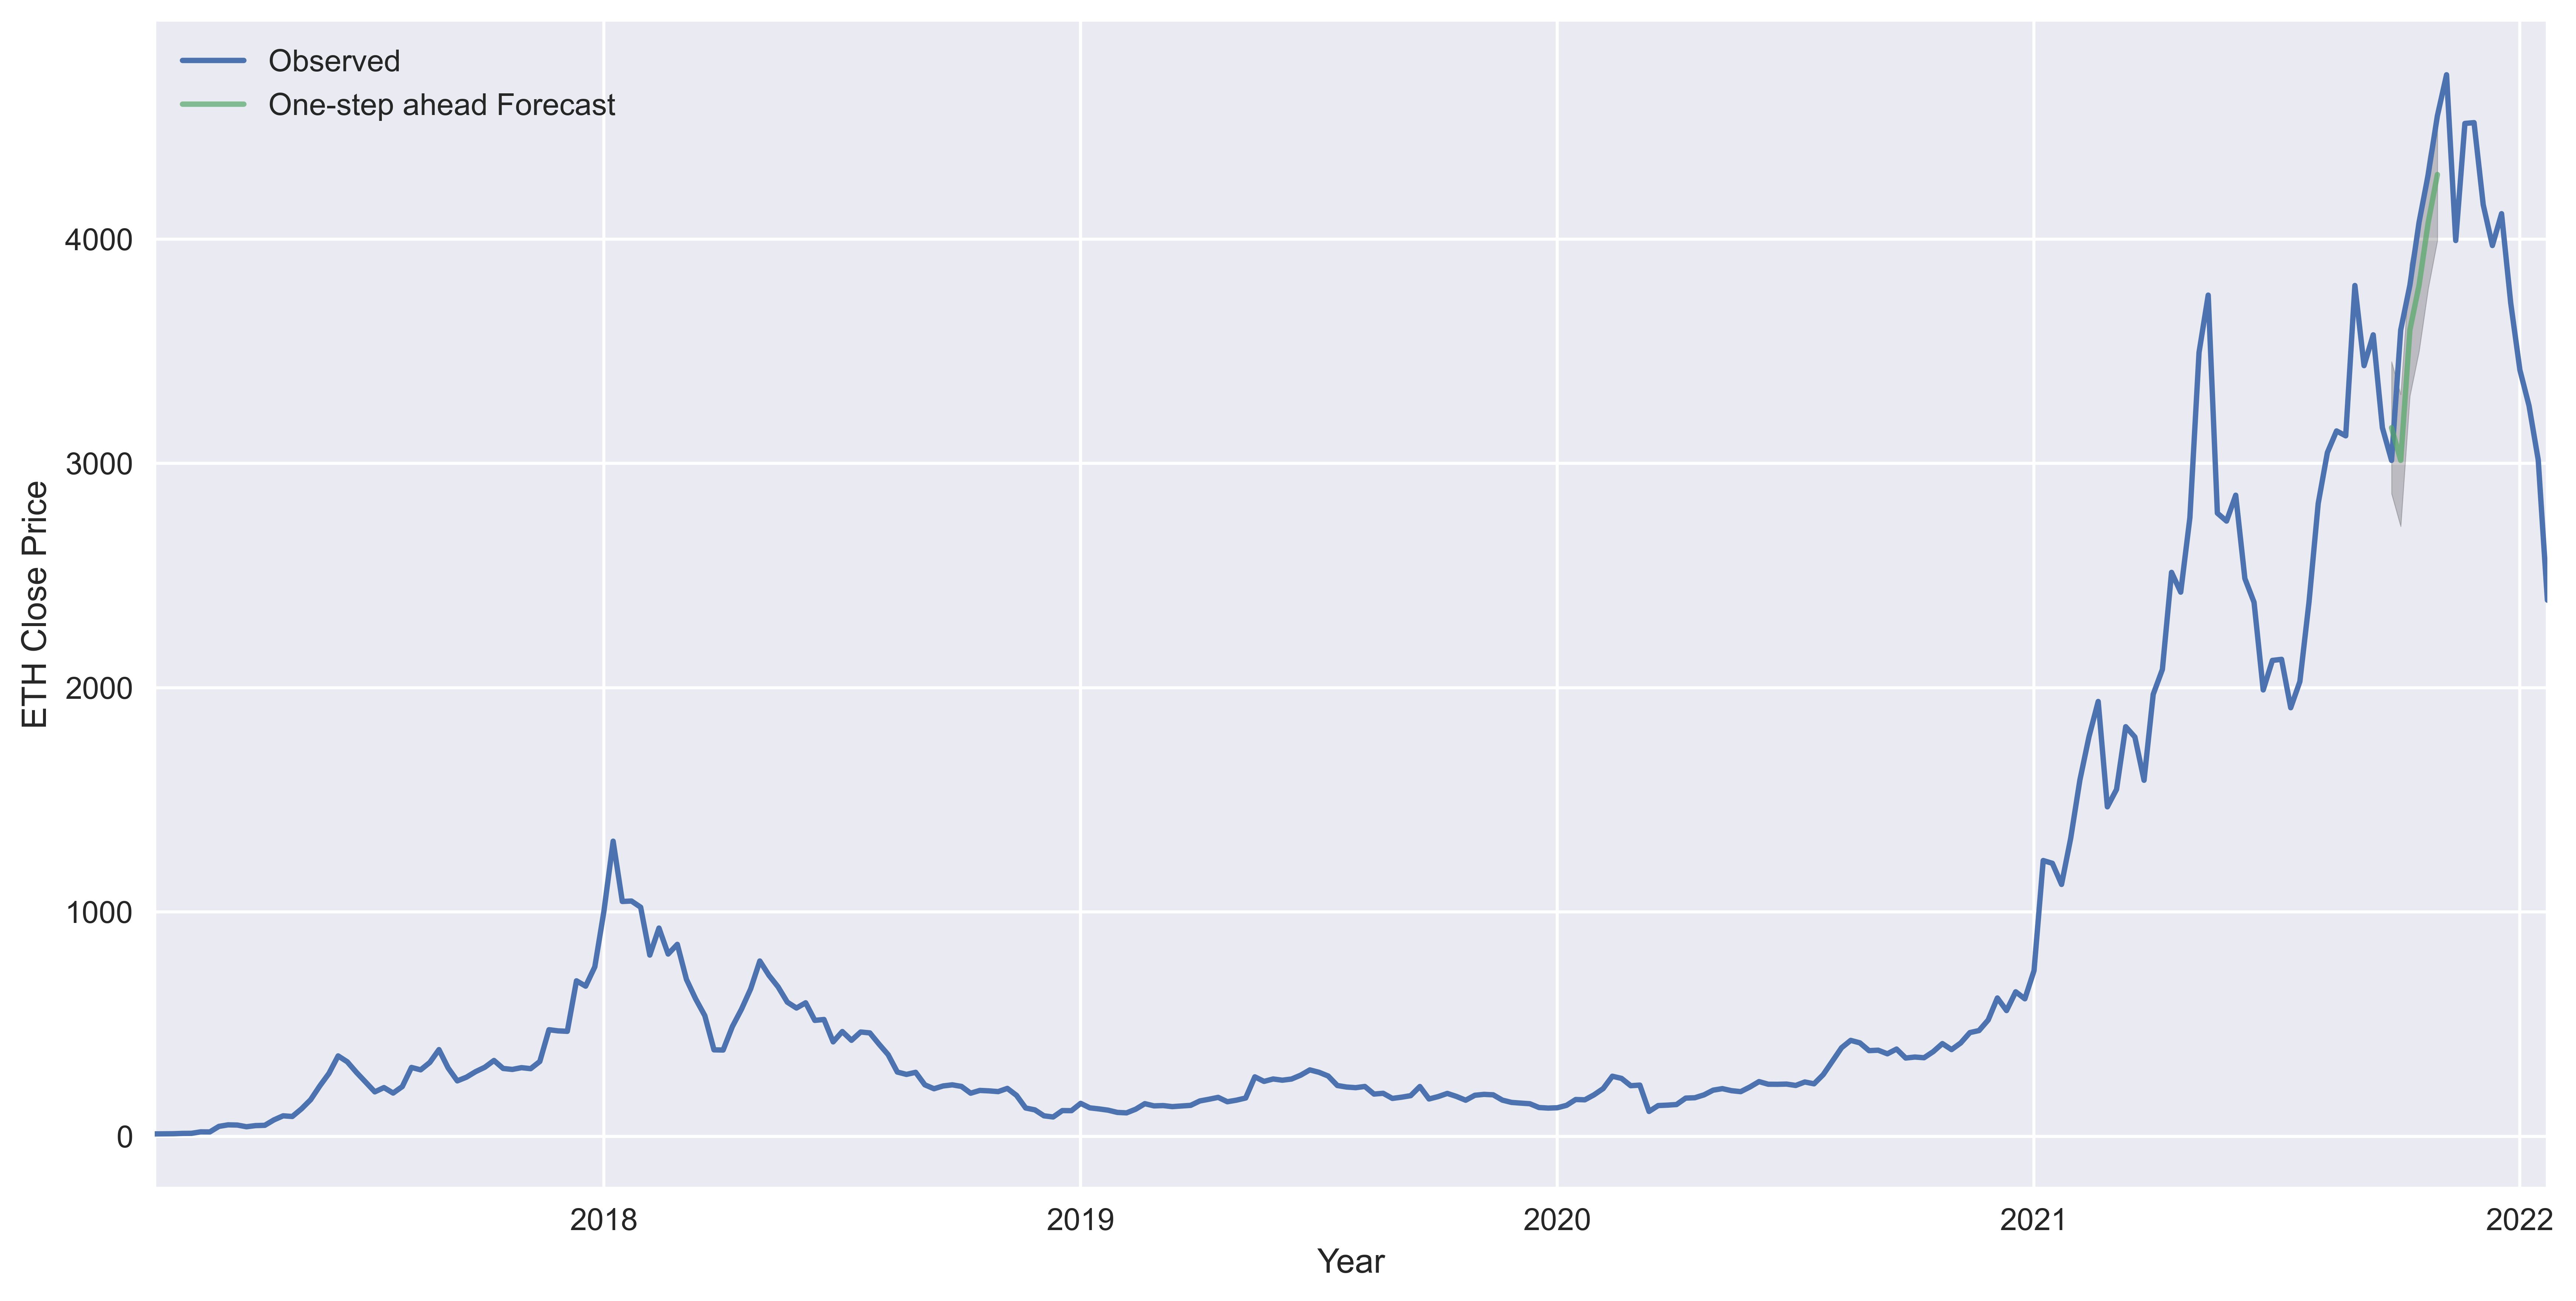

In [45]:
pred_os = model.get_prediction(start='2021-10-01')
pred_ci = pred_os.conf_int()
ax = df_eth['close']['2017':].plot(label='Observed')
pred_os.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('ETH Close Price')
plt.legend()
plt.show()

In [46]:
# from datetime import timedelta
step = 156
day_last_train = train.index.max() + timedelta(days=1)
date_list = [day_last_train + timedelta(days=x) for x in range(step)]

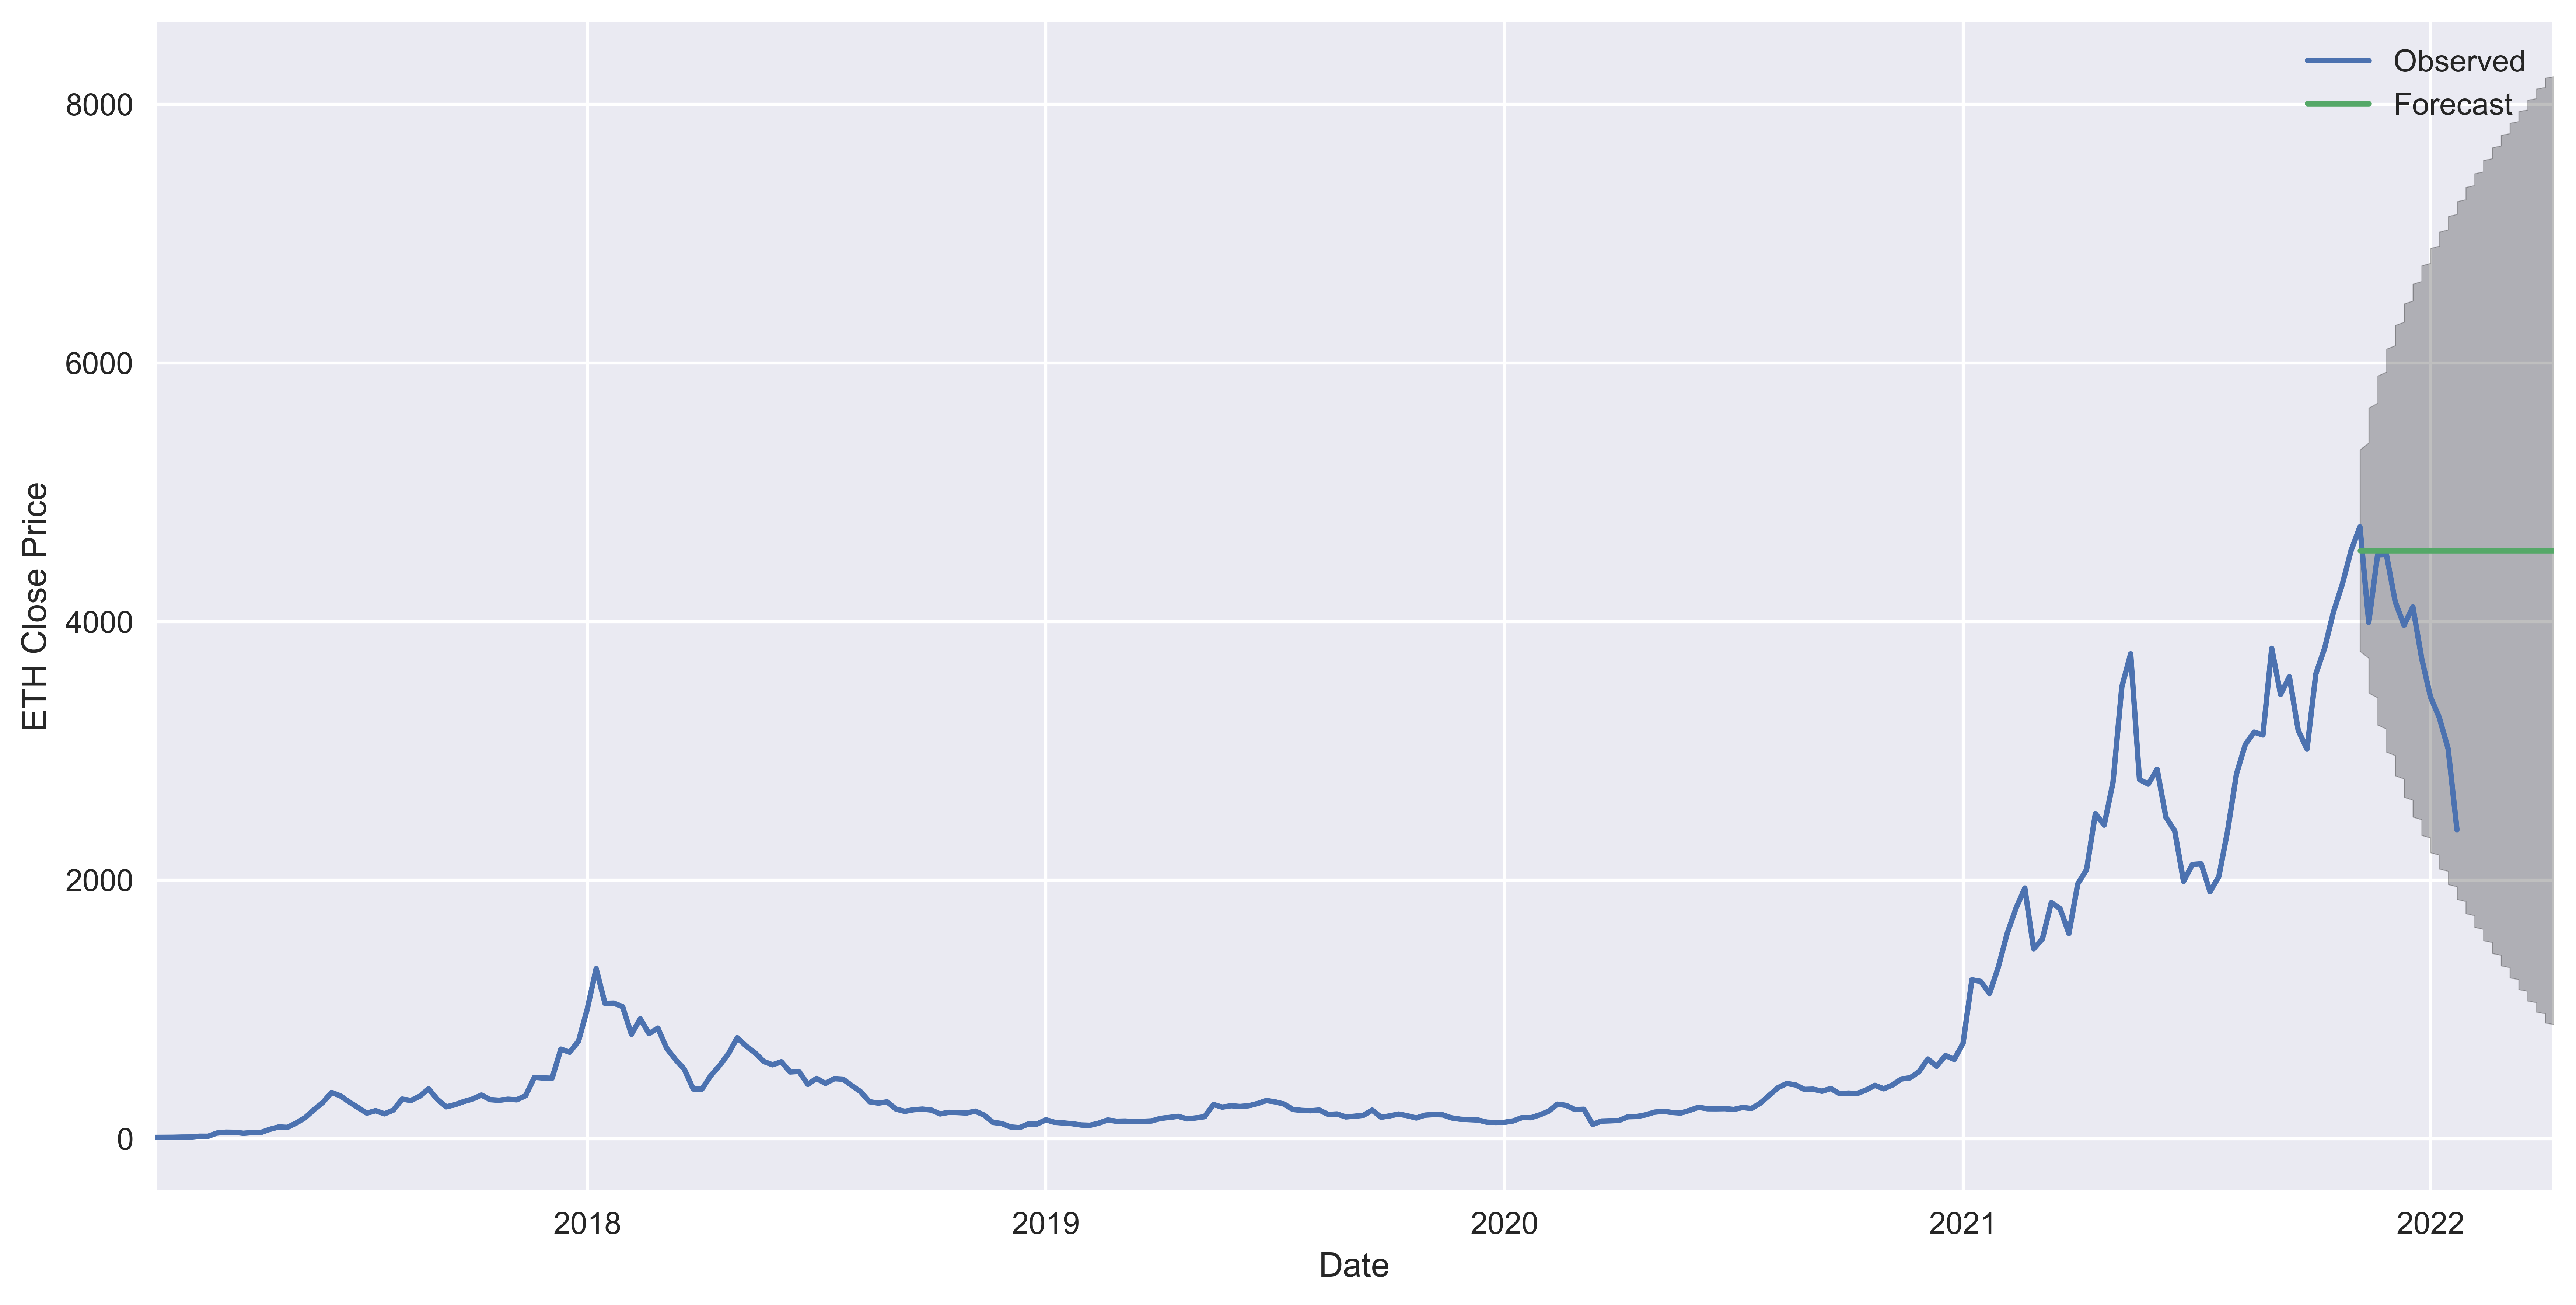

In [47]:
## Dự báo tiếp
pred_uc = model.get_forecast(steps=step)
pred_ci = pred_uc.conf_int()

df_mean = pred_uc.predicted_mean
df_mean.index = date_list
pred_ci.index = date_list

ax = df_eth['close'].plot(label='Observed', figsize=(14, 7))
df_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('ETH Close Price')
plt.legend()
plt.show()

In [48]:
df_market_dict['ethereum'].to_excel("K194141737_Bui Nguyen Thuy Nhu_FinalData.xlsx")